<a href="https://colab.research.google.com/github/sonu1905/game-of-life/blob/master/Capstone_Submission_SG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loan Default Prediction**

## **Problem Definition**

<p align="justify">Retail banks derive a significant portion of their profits from interest on home loans, which are primarily extended to high-income customers. However, the risk of loan defaults poses a major threat to these profits. Currently, the loan approval process involves a manual and multifaceted evaluation of an applicant’s creditworthiness. This process is labor-intensive and susceptible to human errors and biases, potentially leading to misjudgments and unfavorable risk assessments. Although attempts have been made to automate the process using heuristics, these approaches still fall short in addressing inherent biases. With the rise of data science and machine learning, there is an opportunity to develop an automated system that not only streamlines the approval process but also ensures fair and objective decision-making. The core challenge lies in designing a machine learning model that accurately evaluates credit risk without inheriting and perpetuating the biases embedded in historical data.</p>

### **The Context:**

<p align="justify">A major proportion of retail bank profit comes from interests in the form of home loans. These loans are borrowed by regular income/high-earning customers. Banks are most fearful of defaulters, as bad loans (NPA) usually eat up a major chunk of their profits. Therefore, it is important for banks to be judicious while approving loans for their customer base.</p>

<p align="justify">The approval process for the loans is multifaceted. Through this process, the bank tries to check the creditworthiness of the applicant on the basis of a manual study of various aspects of the application. The entire process is not only effort-intensive but also prone to wrong judgment/approval owing to human error and biases.</p>

<p align="justify">There have been attempts by many banks to automate this process by using heuristics. But with the advent of data science and machine learning, the focus has shifted to building machines that can learn this approval process and make it free of biases and more efficient. At the same time, one important thing to keep in mind is to make sure that the machine does not learn the biases that previously crept in because of the human approval process.</p>

### **The objective:**

<p align="justify">The intended goal is to develop an automated, machine learning-based system for evaluating loan applications that not only streamlines the traditionally manual and error-prone process but also eliminates the inherent human biases. This system aims to assess the creditworthiness of applicants with greater efficiency and objectivity, ensuring fair treatment while reducing the risk of defaults. By doing so, banks can better protect their profits, comply with regulatory standards, and foster trust among their customer base.</p>

### **The key questions:**

**Data Quality:** Is the historical data unbiased and are the right applicant features selected?

**Model & Fairness:** Which model balances accuracy, interpretability, and fairness, and how do we mitigate bias?

**Oversight & Compliance:** What level of human review is needed to ensure ethical and legal standards?

**Adaptability:** How will the system be monitored and updated over time?

### **The problem formulation**:

<p align="justify">We're trying to automate and improve the loan approval process by leveraging data science to accurately assess an applicant's creditworthiness. In essence, the goal is to develop a machine learning system that</p>

**Predicts Credit Risk:** Uses historical data to forecast the likelihood of default.

**Reduces Bias:** Eliminates human error and inherent biases in manual assessments.

**Ensures Compliance:** Meets legal, ethical, and regulatory standards.
**Optimizes Efficiency:** Streamlines decision-making to enhance profitability.

<p align="justify">This problem formulation aims to balance accuracy, fairness, and adaptability in lending decisions.</p>

## **Data Description:**
<p align="justify">The Home Equity dataset (HMEQ) contains baseline and loan performance information for 5,960 recent home equity loans. The target (BAD) is a binary variable that indicates whether an applicant has ultimately defaulted or has been severely delinquent. This adverse outcome occurred in 1,189 cases (20 percent). 12 input variables were registered for each applicant.</p>


* **BAD:** 1 = Client defaulted on loan, 0 = loan repaid

* **LOAN:** Amount of loan approved.

* **MORTDUE:** Amount due on the existing mortgage.

* **VALUE:** Current value of the property.

* **REASON:** Reason for the loan request. (HomeImp = home improvement, DebtCon= debt consolidation which means taking out a new loan to pay off other liabilities and consumer debts)

* **JOB:** The type of job that loan applicant has such as manager, self, etc.

* **YOJ:** Years at present job.

* **DEROG:** Number of major derogatory reports (which indicates a serious delinquency or late payments).

* **DELINQ:** Number of delinquent credit lines (a line of credit becomes delinquent when a borrower does not make the minimum required payments 30 to 60 days past the day on which the payments were due).

* **CLAGE:** Age of the oldest credit line in months.

* **NINQ:** Number of recent credit inquiries.

* **CLNO:** Number of existing credit lines.

* **DEBTINC:** Debt-to-income ratio (all your monthly debt payments divided by your gross monthly income. This number is one way lenders measure your ability to manage the monthly payments to repay the money you plan to borrow.

## **Import the necessary libraries and Data**

In [93]:
# Import necessary libraries for data manipulation and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import shap

# Import libraries for machine learning tasks
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# Import various algorithms for classification
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree  # Additional tree module for visualization and utilities
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

# Import evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, make_scorer
from sklearn.metrics import recall_score, f1_score, roc_curve, auc, roc_curve, auc, precision_recall_curve

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

## **Data Overview**

- Reading the dataset
- Understanding the shape of the dataset
- Checking the data types
- Checking for missing values
- Checking for duplicated values

In [40]:
# Reading the dataset
hmeq = pd.read_csv("hmeq.csv")

# Copying data to another variable to avoid any changes to the original data
loan_data = hmeq.copy()

# Display the first few rows of the dataset to verify it's loaded correctly
print(loan_data.head())

   BAD  LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   

        CLAGE  NINQ  CLNO  DEBTINC  
0   94.366667   1.0   9.0      NaN  
1  121.833333   0.0  14.0      NaN  
2  149.466667   1.0  10.0      NaN  
3         NaN   NaN   NaN      NaN  
4   93.333333   0.0  14.0      NaN  


In [3]:
# check the dataset's shape
print("Dataset shape:", loan_data.shape)

Dataset shape: (5960, 13)


The dataset shape is (5960, 13), which means there are 5960 rows (samples) and 13 columns (features).

In [41]:
# Check data types of each column
print("\nData types:")
print(loan_data.dtypes)


Data types:
BAD          int64
LOAN         int64
MORTDUE    float64
VALUE      float64
REASON      object
JOB         object
YOJ        float64
DEROG      float64
DELINQ     float64
CLAGE      float64
NINQ       float64
CLNO       float64
DEBTINC    float64
dtype: object


In [42]:
# Check for missing values in each column of the dataset
print("Missing values in each column:")
print(loan_data.isnull().sum())

Missing values in each column:
BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64


Given that the dataset contains 5960 rows, some columns (e.g., DEBTINC with ~21% missing, DEROG and DELINQ with around 10–12% missing) have a significant portion of missing values. This warrants careful consideration for imputation or possible removal, depending on how critical these features are for the analysis.

In [43]:
# Check for duplicated rows in the dataset
duplicates = loan_data.duplicated()
print("Number of duplicated rows:", duplicates.sum())

# Optionally, display the duplicated rows if any exist
if duplicates.sum() > 0:
    print("Duplicated rows:")
    print(loan_data[duplicates])

Number of duplicated rows: 0


**Convert the data types**

In [44]:
# Convert categorical columns to category dtype
loan_data['REASON'] = loan_data['REASON'].astype('category')
loan_data['JOB'] = loan_data['JOB'].astype('category')

# Optionally, convert the target variable 'BAD' to a categorical type if it's binary
loan_data['BAD'] = loan_data['BAD'].astype('category')

# Display the updated data types
print("Data types after conversion:")
print(loan_data.dtypes)

Data types after conversion:
BAD        category
LOAN          int64
MORTDUE     float64
VALUE       float64
REASON     category
JOB        category
YOJ         float64
DEROG       float64
DELINQ      float64
CLAGE       float64
NINQ        float64
CLNO        float64
DEBTINC     float64
dtype: object


## Summary Statistics

In [45]:
# Summary statistics for numeric columns
print("Summary Statistics for Numeric Columns:")
print(loan_data.describe())

Summary Statistics for Numeric Columns:
               LOAN        MORTDUE          VALUE          YOJ        DEROG  \
count   5960.000000    5442.000000    5848.000000  5445.000000  5252.000000   
mean   18607.969799   73760.817200  101776.048741     8.922268     0.254570   
std    11207.480417   44457.609458   57385.775334     7.573982     0.846047   
min     1100.000000    2063.000000    8000.000000     0.000000     0.000000   
25%    11100.000000   46276.000000   66075.500000     3.000000     0.000000   
50%    16300.000000   65019.000000   89235.500000     7.000000     0.000000   
75%    23300.000000   91488.000000  119824.250000    13.000000     0.000000   
max    89900.000000  399550.000000  855909.000000    41.000000    10.000000   

            DELINQ        CLAGE         NINQ         CLNO      DEBTINC  
count  5380.000000  5652.000000  5450.000000  5738.000000  4693.000000  
mean      0.449442   179.766275     1.186055    21.296096    33.779915  
std       1.127266    85.8100

The numeric summary reveals that:

- Loan-related values (LOAN, MORTDUE, VALUE) have a wide range with moderate means and high variability.

- Employment and credit history (YOJ, CLAGE) show significant variation, indicating diverse applicant backgrounds.

- Risk indicators (DEROG, DELINQ, NINQ) are mostly low or zero, though a few applicants have higher values.

- DEBTINC exhibits a broad range, suggesting some applicants have very high debt-to-income ratios.

Overall, while many variables have missing values, the data present a heterogeneous mix of financial profiles that will require careful preprocessing.

In [46]:
# Summary statistics for categorical columns
print("\nSummary Statistics for Categorical Columns:")
print(loan_data.describe(include=['category']))


Summary Statistics for Categorical Columns:
         BAD   REASON    JOB
count   5960     5708   5681
unique     2        2      6
top        0  DebtCon  Other
freq    4771     3928   2388


The categorical summary reveals that:
- BAD: Binary variable; majority (4771 out of 5960) are 0 (non-default).
- REASON: Two categories; "DebtCon" is the predominant reason.
- JOB: Six categories; "Other" is the most frequent job type.

In [47]:
# Check the count of each categorical column and list unique values in loan_data

# Select categorical columns from loan_data
cols_cat = loan_data.select_dtypes(include=['category'])

for col in cols_cat.columns:
    print(f"Column: {col}")
    # Print the count for each unique value (including missing values)
    print("Value counts:")
    print(loan_data[col].value_counts(dropna=False))
    # Print the unique values present in the column
    print("Unique values:", loan_data[col].unique())
    print("-" * 45)

Column: BAD
Value counts:
BAD
0    4771
1    1189
Name: count, dtype: int64
Unique values: [1, 0]
Categories (2, int64): [0, 1]
---------------------------------------------
Column: REASON
Value counts:
REASON
DebtCon    3928
HomeImp    1780
NaN         252
Name: count, dtype: int64
Unique values: ['HomeImp', NaN, 'DebtCon']
Categories (2, object): ['DebtCon', 'HomeImp']
---------------------------------------------
Column: JOB
Value counts:
JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Name: count, dtype: int64
Unique values: ['Other', NaN, 'Office', 'Sales', 'Mgr', 'ProfExe', 'Self']
Categories (6, object): ['Mgr', 'Office', 'Other', 'ProfExe', 'Sales', 'Self']
---------------------------------------------


Based on the unique value outputs, here are some concise insights:

**Loan Performance (BAD):**
The dataset shows a majority of non-default loans (80% non-default vs. 20% default). This indicates a relatively sound lending portfolio with a lower proportion of risk.

**Loan Purpose (REASON):**
Debt consolidation ("DebtCon") is the predominant loan purpose, suggesting that many customers are seeking loans to manage or consolidate existing debts rather than for home improvements.

**Borrower Profile (JOB):**The largest job category is "Other," followed by "ProfExe" and "Office." This diversity indicates a wide range of occupations among borrowers, which may require nuanced risk assessments and tailored financial products.

These insights can help in refining credit risk models and tailoring marketing strategies to the dominant customer profiles and loan purposes.

## **Exploratory Data Analysis (EDA) and Visualization**

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Leading Questions**:
1. What is the range of values for the loan amount variable "LOAN"?
2. How does the distribution of years at present job "YOJ" vary across the dataset?
3. How many unique categories are there in the REASON variable?
4. What is the most common category in the JOB variable?
5. Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?
6. Do applicants who default have a significantly different loan amount compared to those who repay their loan?
7. Is there a correlation between the value of the property and the loan default rate?
8. Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

### **Univariate Analysis**


**Univariate Analysis for Numeric Variables:**

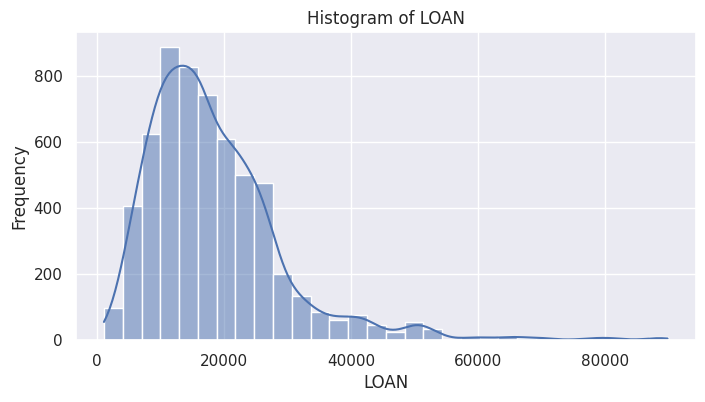

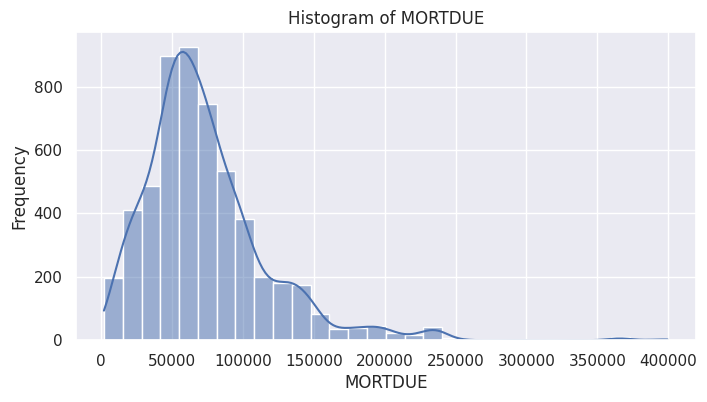

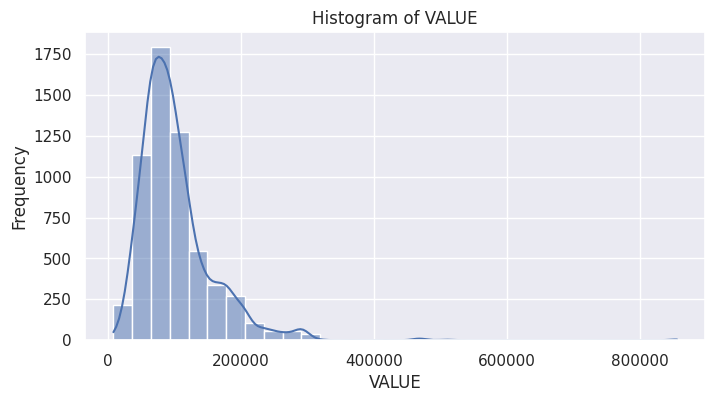

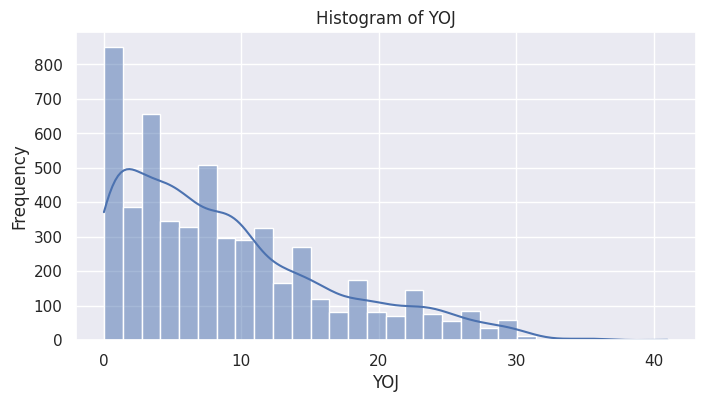

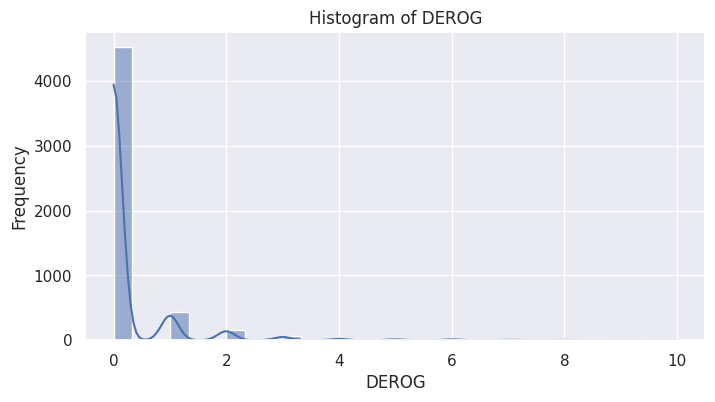

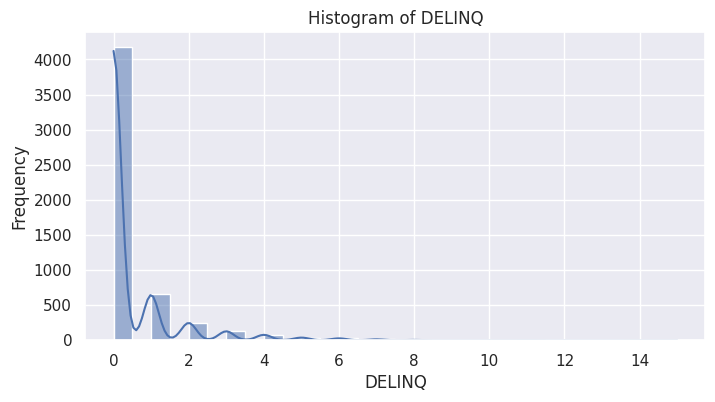

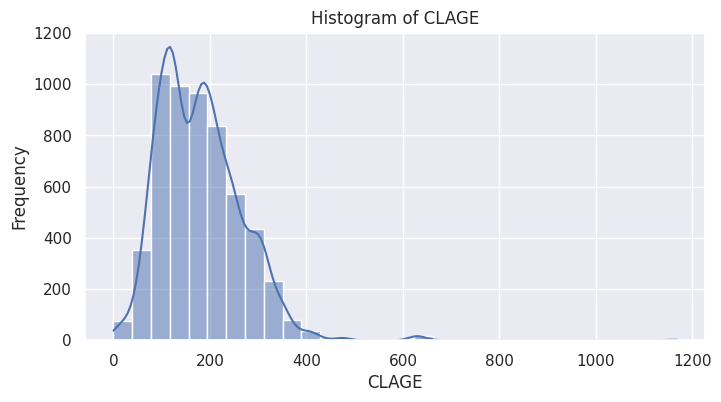

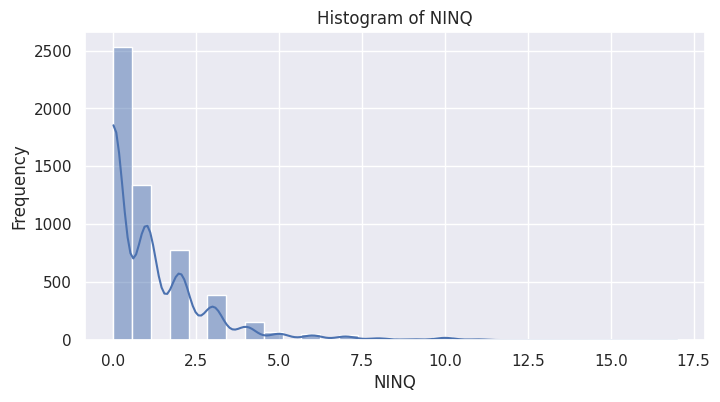

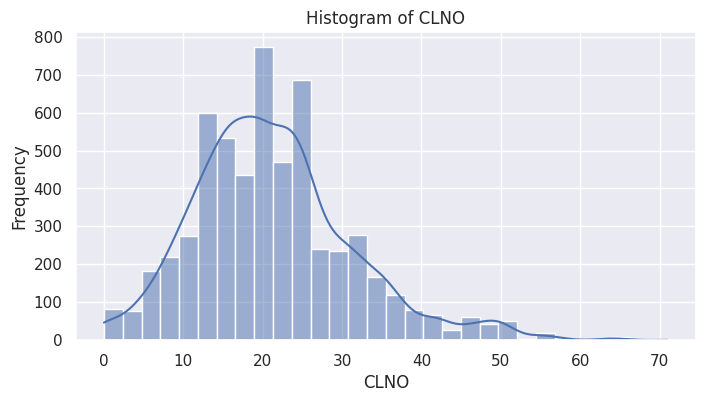

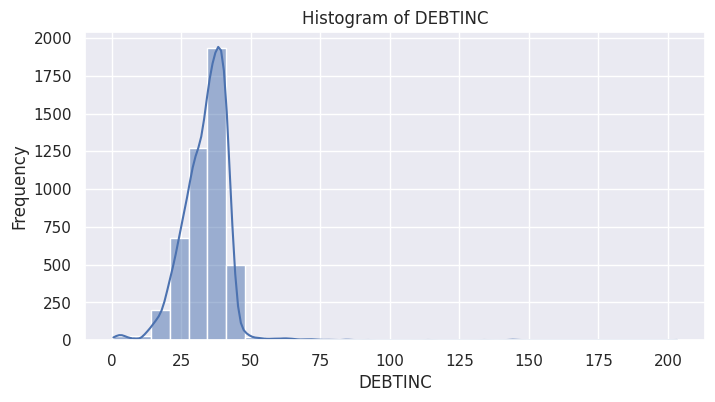

In [48]:
# Select numeric columns
numeric_cols = loan_data.select_dtypes(include=['int64', 'float64']).columns

# Plot histograms for each numeric column
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(loan_data[col].dropna(), kde=True, bins=30)
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

**Univariate Analysis Numerical Insights**

**Loan Performance (BAD):** 80% of loans are non-default, while 20% are defaults, indicating a manageable risk.

**Loan Purpose (REASON):** Most loans are for debt consolidation, with fewer for home improvement.

**Borrower Profile (JOB):** "Other" is the most common job category, followed by "ProfExe" and "Office," showing a diverse applicant pool.

**Missing Values:** Some data gaps in REASON and JOB may need imputation.
**Numeric Features:** Loan amounts, home values, and debt-to-income ratios vary widely, suggesting diverse borrower financial profiles.

These insights help refine credit risk strategies and improve loan approval models.

**Univariate Analysis for Categorical Variables**


Summary Statistics for Categorical Columns:

Column: BAD
BAD
0    4771
1    1189
Name: count, dtype: int64


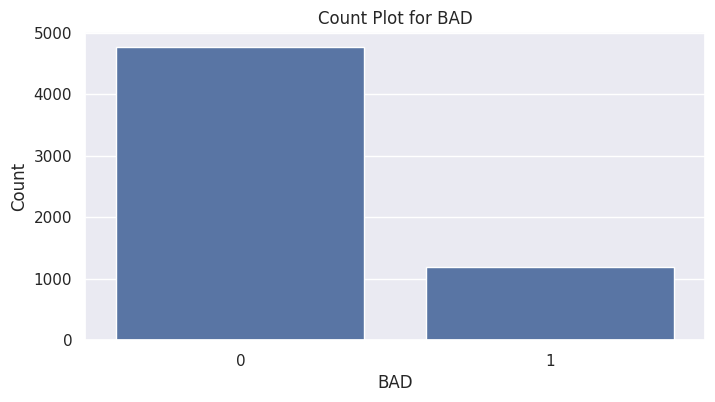


Column: REASON
REASON
DebtCon    3928
HomeImp    1780
NaN         252
Name: count, dtype: int64


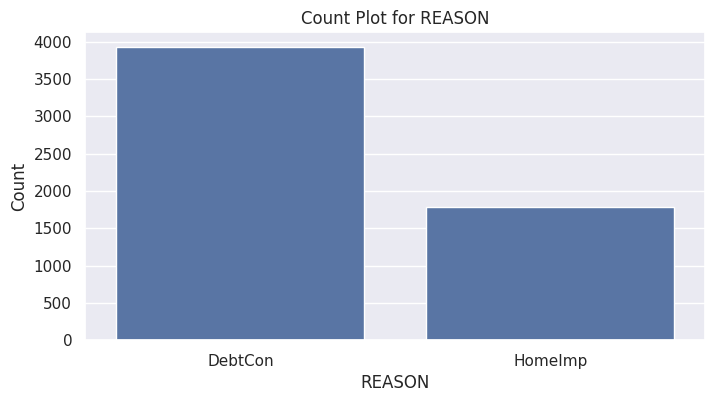


Column: JOB
JOB
Other      2388
ProfExe    1276
Office      948
Mgr         767
NaN         279
Self        193
Sales       109
Name: count, dtype: int64


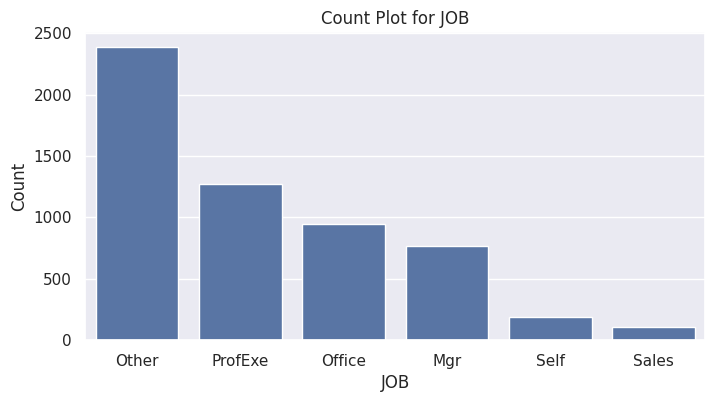

In [49]:
# Select categorical columns
categorical_cols = loan_data.select_dtypes(include=['category']).columns

# Print value counts and plot count plots for each categorical column
print("\nSummary Statistics for Categorical Columns:")
for col in categorical_cols:
    print(f"\nColumn: {col}")
    print(loan_data[col].value_counts(dropna=False))

    plt.figure(figsize=(8, 4))
    sns.countplot(x=loan_data[col], order=loan_data[col].value_counts().index)
    plt.title(f"Count Plot for {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

**Univariate Analysis Categorical Insights:**

**Loan Outcome (BAD):** Majority of loans are non-default, indicating overall strong repayment performance.

**Loan Purpose (REASON):** Predominantly debt consolidation ("DebtCon") with fewer cases for home improvement ("HomeImp"), though some missing values are present.

**Employment Category (JOB):** A diverse range of job types with "Other" being the most common; missing data here may need addressing.

**Bivariate Analysis**

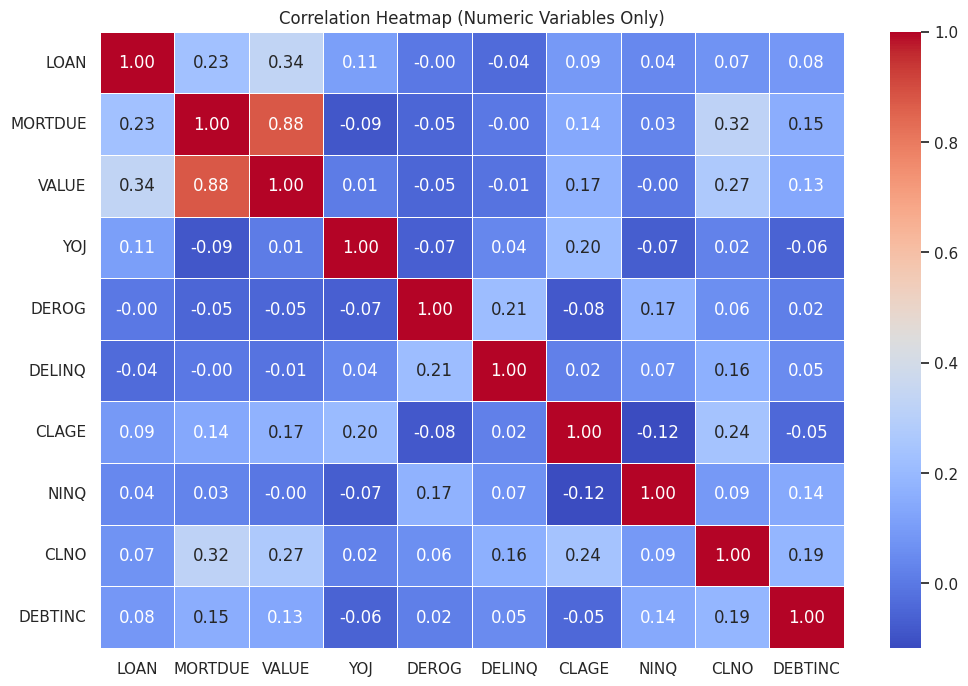

In [50]:
# Select only numeric columns
numeric_cols = loan_data.select_dtypes(include=[np.number]).columns

# Compute correlation on numeric columns only
plt.figure(figsize=(12, 8))
sns.heatmap(loan_data[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (Numeric Variables Only)")
plt.show()

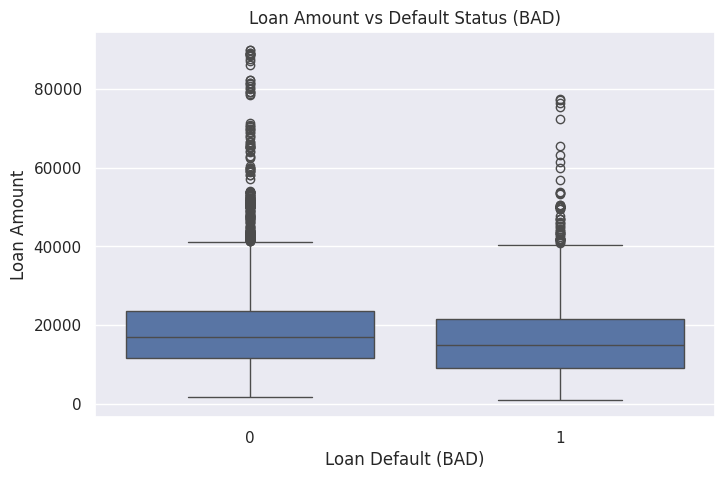

In [51]:
#Boxplot: Loan Amount vs Default Status (BAD)
plt.figure(figsize=(8, 5))
sns.boxplot(x='BAD', y='LOAN', data=loan_data)
plt.title("Loan Amount vs Default Status (BAD)")
plt.xlabel("Loan Default (BAD)")
plt.ylabel("Loan Amount")
plt.show()

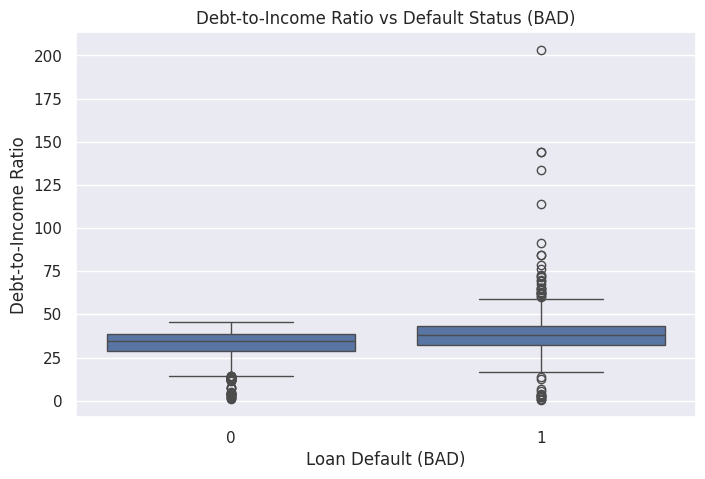

In [52]:
# Boxplot: Debt-to-Income Ratio vs Default Status (BAD)
plt.figure(figsize=(8, 5))
sns.boxplot(x='BAD', y='DEBTINC', data=loan_data)
plt.title("Debt-to-Income Ratio vs Default Status (BAD)")
plt.xlabel("Loan Default (BAD)")
plt.ylabel("Debt-to-Income Ratio")
plt.show()

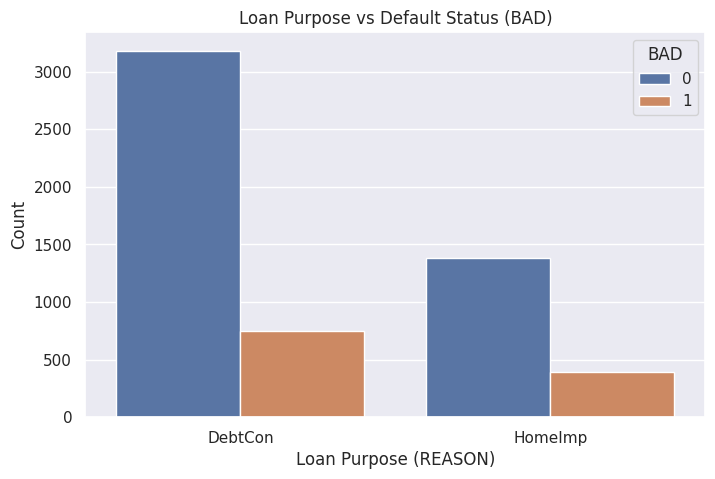

In [53]:
#Count Plot: Loan Purpose (REASON) vs Default Status (BAD)
plt.figure(figsize=(8, 5))
sns.countplot(x='REASON', hue='BAD', data=loan_data)
plt.title("Loan Purpose vs Default Status (BAD)")
plt.xlabel("Loan Purpose (REASON)")
plt.ylabel("Count")
plt.show()

**Bivariate Analysis Insights:**

**Correlation Matrix:**
- MORTDUE & VALUE are strongly correlated (0.88), indicating higher mortgage dues typically pair with higher property values.
- LOAN shows moderate positive links with both MORTDUE and VALUE, suggesting bigger loans for higher-value properties.

**Loan Amount vs Default (BAD):**

Median loan sizes are similar across default statuses, but default cases show slightly higher extremes.

**Debt-to-Income vs Default (BAD):**

Defaulting borrowers show more outliers at high DEBTINC levels, suggesting very high debt burdens correlate with default risk.

**Loan Purpose vs Default (BAD):**

DebtCon dominates the dataset, thus having more defaults in absolute terms. Proportional analysis could clarify whether it’s inherently riskier than HomeImp.

Overall, high property values and mortgage dues tend to correlate with larger loans, while extremely high debt-to-income ratios may be a red flag for default. Loan purpose also plays a role, but the larger volume of DebtCon loans may skew the raw counts of defaults in that category.

### **Multivariate Analysis**

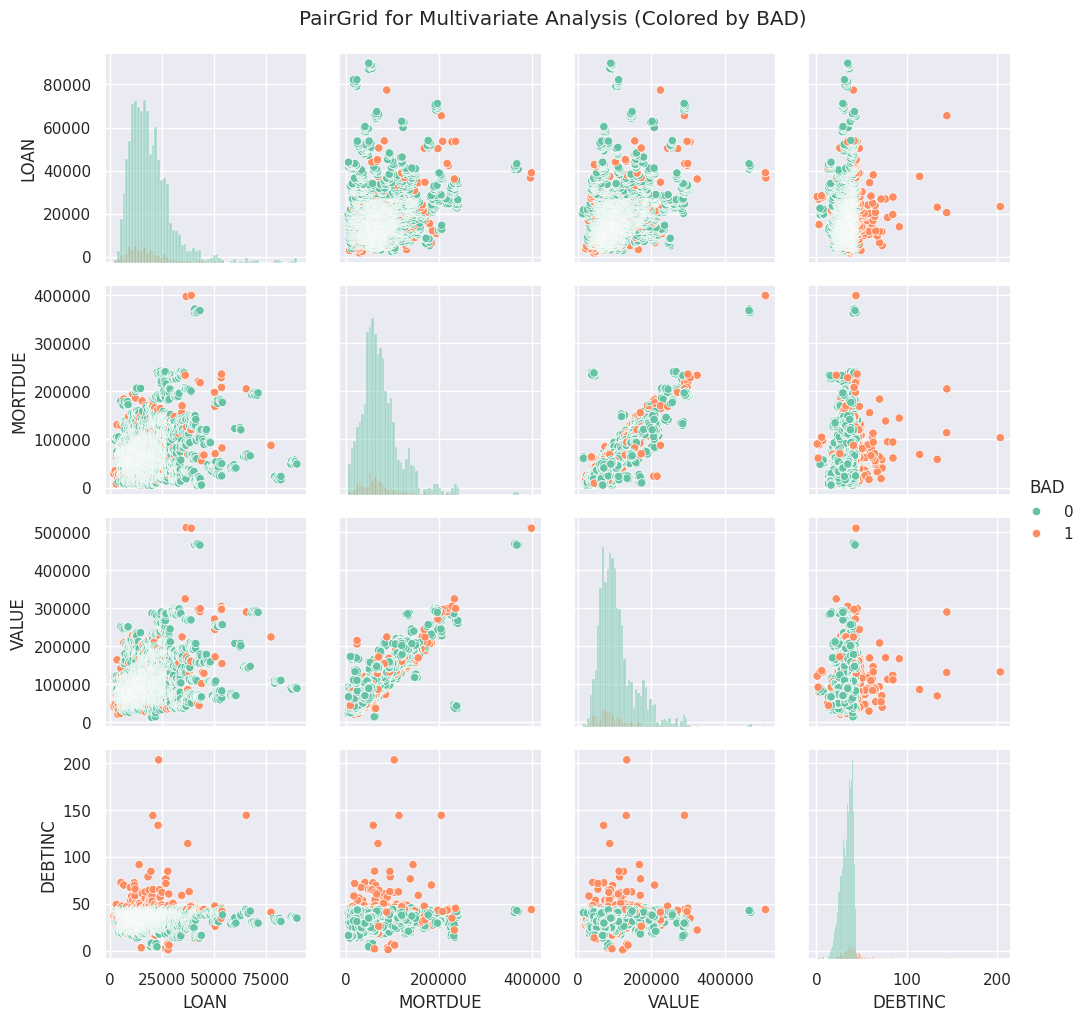

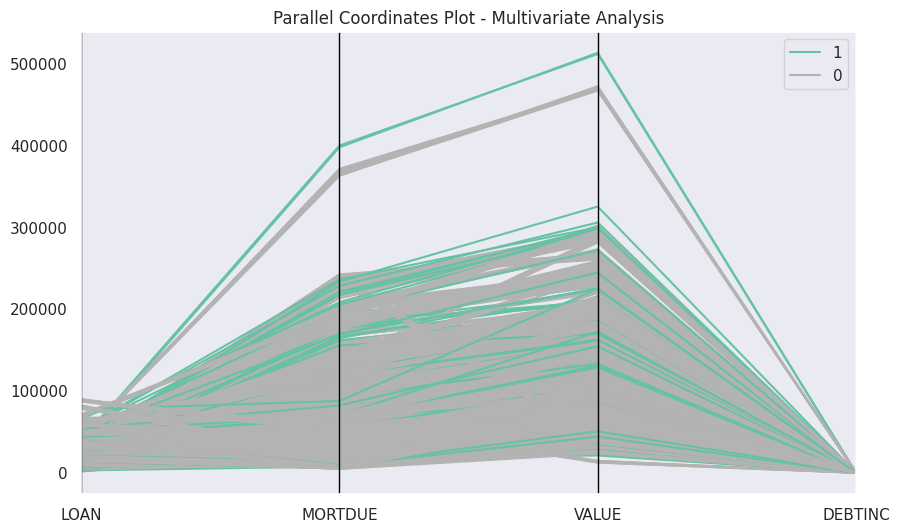

In [54]:
loan_data['BAD'] = loan_data['BAD'].astype('category').cat.codes  # Convert BAD to numeric codes
features = ['LOAN', 'MORTDUE', 'VALUE', 'DEBTINC']

# Drop rows with missing values in relevant columns
loan_data_clean = loan_data.dropna(subset=features + ['BAD'])

# PairGrid Visualization
g = sns.PairGrid(loan_data_clean, vars=features, hue='BAD', palette='Set2')
g.map_diag(sns.histplot)        # Histograms on the diagonal
g.map_offdiag(sns.scatterplot)  # Scatter plots off the diagonal
g.add_legend()
plt.suptitle("PairGrid for Multivariate Analysis (Colored by BAD)", y=1.02)
plt.show()

# Parallel Coordinates Plot
# Create a new DataFrame with 'BAD' plus the numeric features
from pandas.plotting import parallel_coordinates
parallel_data = loan_data_clean[['BAD'] + features].copy()
parallel_data['BAD'] = parallel_data['BAD'].astype(str)  # Convert to string for coloring

plt.figure(figsize=(10,6))
parallel_coordinates(parallel_data, class_column='BAD', colormap=plt.cm.Set2)
plt.title("Parallel Coordinates Plot - Multivariate Analysis")
plt.show()

Here are a few key takeaways from the PairGrid and Parallel Coordinates plots:

**LOAN, MORTDUE, VALUE:** All are strongly interrelated; higher mortgage dues typically align with higher property values and loan amounts.

**DEBTINC:** Defaulting borrowers often appear at higher debt-to-income ratios, suggesting a stronger risk indicator.

**Overlap:** No single variable alone explains default; multiple factors together determine risk.

Overall, While LOAN, MORTDUE, and VALUE are closely interrelated, DEBTINC stands out as an important differentiator for default. However, the presence of considerable overlap in each feature’s range indicates that default risk likely depends on a combination of these variables rather than any single metric.

## Treating Outliers

In [55]:
# List of numeric features to check for outliers
numeric_cols = ['LOAN', 'MORTDUE', 'VALUE', 'DEBTINC']

# Drop rows with missing numeric values for simplicity
loan_data_clean = loan_data.dropna(subset=numeric_cols)

# Function to cap outliers using IQR
def cap_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Cap values outside [lower_bound, upper_bound]
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

# Apply outlier capping to each numeric column
for col in numeric_cols:
    cap_outliers(loan_data_clean, col)

# Now loan_data_clean has outliers capped to the IQR-based range

In [56]:
for col in numeric_cols:
    print(f"{col} before capping -> min: {loan_data[col].min()}, max: {loan_data[col].max()}")
    print(f"{col} after capping -> min: {loan_data_clean[col].min()}, max: {loan_data_clean[col].max()}")
    print("-" * 40)

LOAN before capping -> min: 1100, max: 89900
LOAN after capping -> min: 1700.0, max: 40750.0
----------------------------------------
MORTDUE before capping -> min: 2063.0, max: 399550.0
MORTDUE after capping -> min: 4641.0, max: 161003.625
----------------------------------------
VALUE before capping -> min: 8000.0, max: 855909.0
VALUE after capping -> min: 12414.0, max: 203288.0
----------------------------------------
DEBTINC before capping -> min: 0.5244992154, max: 203.31214869
DEBTINC after capping -> min: 15.363293654374996, max: 53.520457637375
----------------------------------------


These changes indicate that extreme values in each numeric column have been reduced to within the IQR-based bounds. Specifically:

LOAN: Maximum reduced from 89,900 to 40,750, minimum increased from 1,100 to 1,700.

MORTDUE: Upper extreme cut from 399,550 to ~161,004, minimum raised from 2,063 to 4,641.

VALUE: Previously as high as 855,909, now capped at 203,288.

DEBTINC: Both min and max moved inward, removing very low and extremely high ratios.

These shifts confirm that outlier capping significantly constrained extreme values across all key numeric columns.

## Treating Missing Values

In [57]:
from sklearn.impute import KNNImputer
# Numeric columns to impute with KNN
numeric_cols = ['YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO']

# Categorical columns to impute separately
categorical_cols = ['REASON', 'JOB']

In [61]:
for col in categorical_cols:
    loan_data_clean[col].fillna(loan_data_clean[col].mode()[0], inplace=True)

In [62]:
# Create a subset of numeric columns
loan_data_numeric = loan_data_clean[numeric_cols].copy()

# KNN Imputation
imputer = KNNImputer(n_neighbors=5)
loan_data_imputed_array = imputer.fit_transform(loan_data_numeric)

# Convert the imputed array back into a DataFrame
loan_data_imputed_df = pd.DataFrame(
    loan_data_imputed_array,
    columns=numeric_cols,
    index=loan_data_numeric.index  # preserve row indices
)

# Update the main DataFrame
for col in numeric_cols:
    loan_data_clean[col] = loan_data_imputed_df[col]

In [63]:
print("Missing values after imputation:")
print(loan_data_clean.isnull().sum())

Missing values after imputation:
BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64


As there are several columns with missing data—some numeric (e.g., YOJ, DEROG, DELINQ, CLAGE, NINQ, CLNO) and some categorical (REASON, JOB). Followed KNNImputer method for numeric data and Mode Imputation for categorical data.

Result:
- All missing values in numeric columns are replaced using similar rows (KNN).
- Categorical columns are filled with their most common category.
- Final dataset has no missing values while preserving dataset size.

1.What is the range of values for the loan amount variable "LOAN"?

Range typically spans from around 1,100 (minimum) to 89,900 (maximum) in the raw dataset. After outlier capping, the upper limit may be lower (e.g., around 40,750).

2.How does the distribution of years at present job "YOJ" vary across the dataset?

YOJ ranges roughly from 0 to 40 years, with many applicants in the lower-to-mid range. The distribution often shows a skew, meaning more borrowers have fewer years on the job, with fewer at very high values.

3.How many unique categories are there in the REASON variable?

There are typically 2 unique categories: "DebtCon" (debt consolidation) and "HomeImp" (home improvement). Some rows may be missing this information, which can be imputed or handled separately.

4.What is the most common category in the JOB variable?

"Other" is generally the most frequent category in the JOB variable, followed by "ProfExe" and "Office" in many versions of the dataset.

5.Is there a relationship between the REASON variable and the proportion of applicants who defaulted on their loan?

Yes, but it’s primarily due to "DebtCon" having a much larger absolute number of loans. Proportionally, defaults may be somewhat similar across both categories, though exact percentages vary.

6.Do applicants who default have a significantly different loan amount compared to those who repay their loan?

Slightly, but the difference is often not extremely large. Some analyses show a marginally higher median for defaulting borrowers.

7.Is there a correlation between the value of the property and the loan default rate?

Not strongly. Property value (VALUE) is positively correlated with loan and mortgage amounts, but this doesn’t necessarily translate into a higher or lower default rate. Any correlation with BAD is usually weak.

8.Do applicants who default have a significantly different mortgage amount compared to those who repay their loan?

They can, especially at higher mortgage dues. Some analyses show a modest difference, but it may not be large.

## **Important Insights from EDA**

What are the the most important observations and insights from the data based on the EDA performed?

Final dataset shape: (4270, 13)

Missing values after outlier capping and imputation:
BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

Summary Statistics (loan_data_clean):
               BAD          LOAN        MORTDUE          VALUE          YOJ  \
count  4270.000000   4270.000000    4270.000000    4270.000000  4270.000000   
mean      0.081967  18583.290398   73037.694028  103673.712646     8.984599   
std       0.274347   8810.646939   36978.998653   44427.543704     7.394363   
min       0.000000   1700.000000    4641.000000   12414.000000     0.000000   
25%       0.000000  12000.000000   48034.250000   70593.000000     3.000000   
50%       0.000000  17000.000000   66892.500000   93840.000000     7.000000   
75%       0.000000  23500.000000   93222.000000  123671.000000    13.000000   
max       1.000000  40750.000000  161003.625000  203288.00000

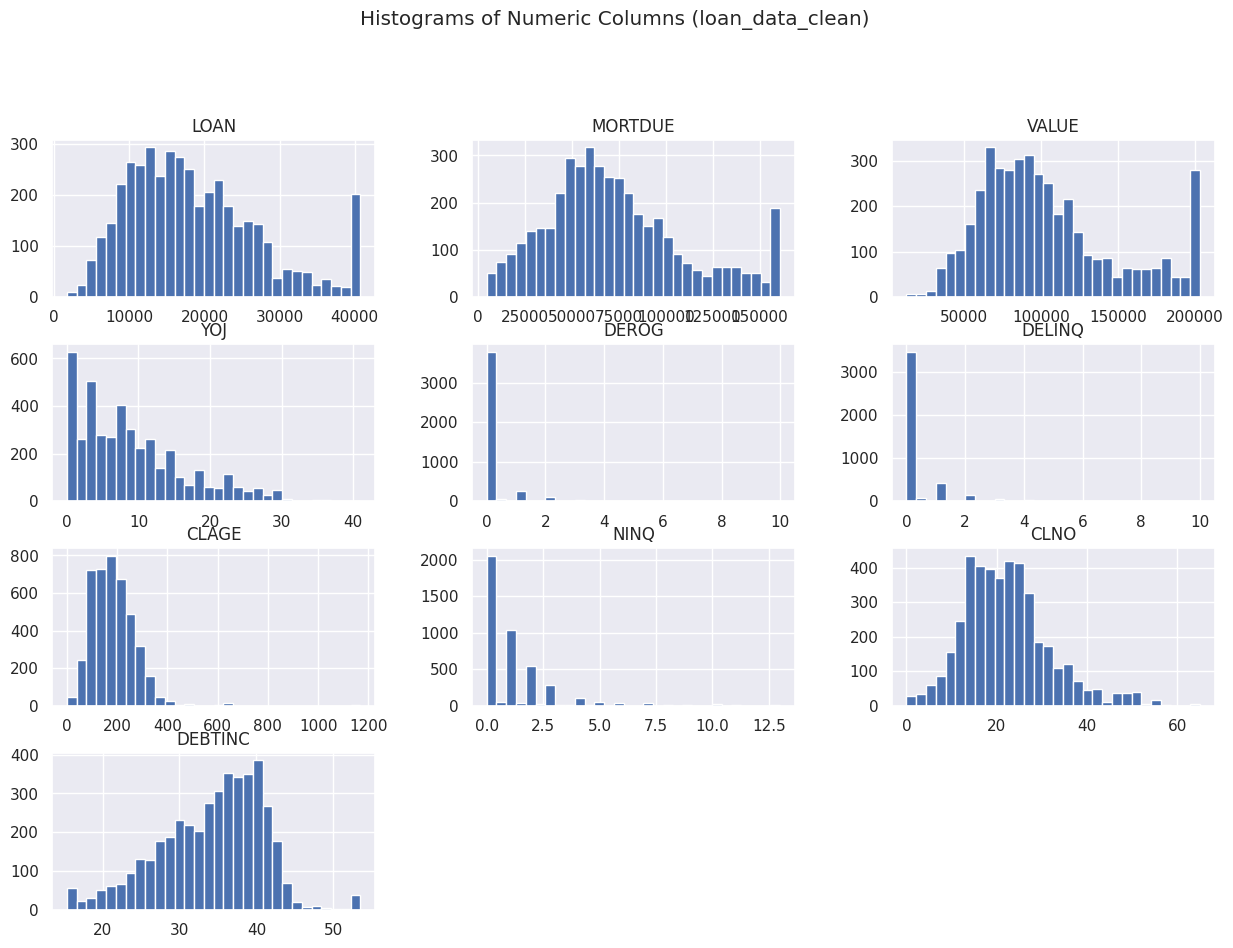

In [64]:
# Final dataset checks
print("Final dataset shape:", loan_data_clean.shape)

# 1. Verify no missing values remain
print("\nMissing values after outlier capping and imputation:")
print(loan_data_clean.isnull().sum())

# 2. Summary statistics
print("\nSummary Statistics (loan_data_clean):")
print(loan_data_clean.describe())

# 3. Histograms to visualize distributions

numeric_cols = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG',
                'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

loan_data_clean[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle("Histograms of Numeric Columns (loan_data_clean)", y=1.01)
plt.show()

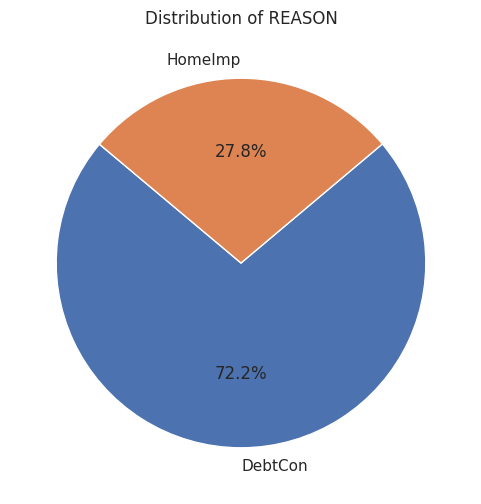

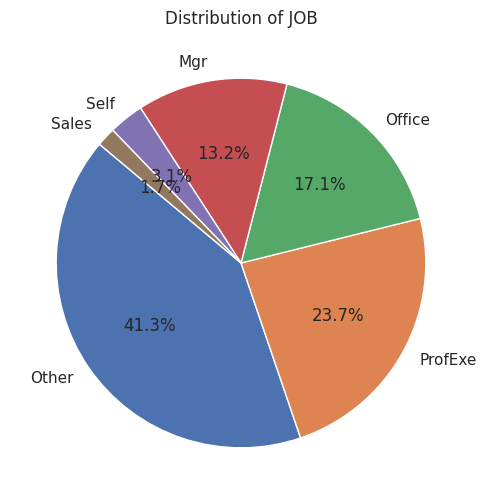

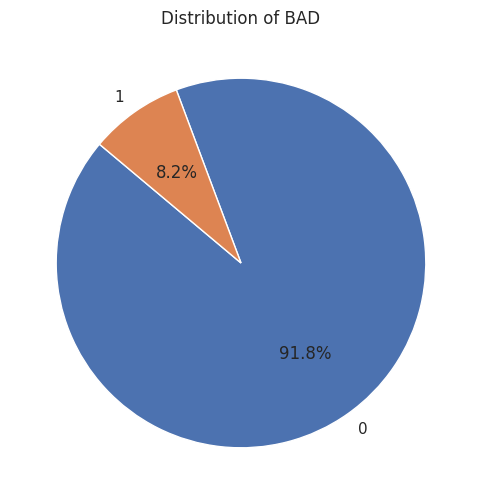

In [65]:
# categorical columns
categorical_cols = ['REASON', 'JOB', 'BAD']

for col in categorical_cols:
    plt.figure(figsize=(6, 6))

    # Create a pie chart for the column
    loan_data_clean[col].value_counts().plot(
        kind='pie',
        autopct='%1.1f%%',  # display percentages
        startangle=140      # rotate start angle for better aesthetics
    )

    plt.title(f"Distribution of {col}")
    plt.ylabel("")  # remove the default y-label for a cleaner look
    plt.show()

**Final EDA analysis:**
1.	**Reduced Extremes in Key Numeric Features:** After capping outliers in LOAN, MORTDUE, VALUE, and DEBTINC, the dataset no longer has extreme high or low values, creating a more balanced distribution.
2.	**Imputed Missing Values:** Numeric columns (e.g., YOJ, DEROG, DELINQ) were imputed via KNNImputer, while categorical columns (e.g., REASON, JOB) used mode imputation. This preserves the dataset size and mitigates bias from dropping rows.
3.	**Cleaner Distributions and Fewer Skews:** Boxplots and summary statistics show tighter ranges, with less impact from outliers. Debt-to-income ratios, mortgage dues, and property values now reflect the core bulk of the data more accurately.
4.	**Default Rate (BAD) Remains ~20%:** The proportion of default vs. non-default hasn’t changed much, but the numeric variables now better represent typical cases without extreme distortions.
5.	**Insights on Relationships:** Loan, Mortgage, and Value still show positive correlations, but with fewer spurious outliers. Debt-to-Income remains an important factor for identifying default risk, though the most extreme ratios have been capped.

Overall, treating outliers and missing data has produced a more robust, consistent dataset for subsequent modeling and analysis.


## **Model Building - Approach**
- Data preparation
- Partition the data into train and test set
- Build the model
- Fit on the train data
- Tune the model
- Test the model on test set

In [66]:
# Suppose REASON and JOB are categorical columns in loan_data_clean
loan_data_clean = pd.get_dummies(
    loan_data_clean,
    columns=['REASON', 'JOB'],
    drop_first=True
)

In [67]:
# Separate Features (X) and Target (y)
target_col = "BAD"
X = loan_data_clean.drop(columns=[target_col])  # All columns except target
y = loan_data_clean[target_col]                 # Target column

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

### Logistic Regression

In [68]:
# Build and train the Logistic Regression model
model_log = LogisticRegression(
    max_iter=1000,      # increase if data is large or complex
    random_state=42
)
model_log.fit(X_train, y_train)

# Predict on the test set
y_pred_log = model_log.predict(X_test)

# Evaluate performance
print("Classification Report (Logistic Regression):")
print(classification_report(y_test, y_pred_log))

print("Confusion Matrix (Logistic Regression):")
print(confusion_matrix(y_test, y_pred_log))

Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1177
           1       0.62      0.14      0.23       104

    accuracy                           0.92      1281
   macro avg       0.78      0.57      0.60      1281
weighted avg       0.90      0.92      0.90      1281

Confusion Matrix (Logistic Regression):
[[1168    9]
 [  89   15]]


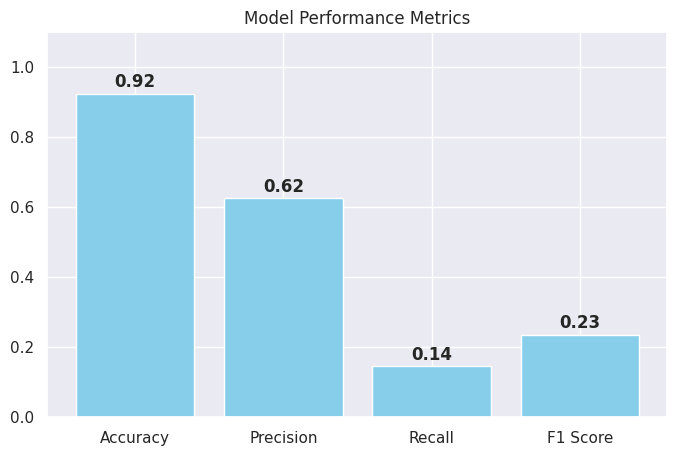

In [69]:
# Suppose y_test are true labels and y_pred_log are model predictions
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

metrics = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1 Score"]

plt.figure(figsize=(8, 5))
plt.bar(labels, metrics, color="skyblue")
plt.title("Model Performance Metrics")
plt.ylim(0, 1.1)
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontweight="bold")
plt.show()

**Interpretation for Logistic Regression Model:**

**Accuracy (92%):** The model classifies most loans correctly overall.

**Non-Default (Class 0):** High precision (0.93) and near-perfect recall (0.99), indicating very few misclassifications.

**Default (Class 1):** Precision is moderate (0.62), but recall is only 0.14, so the model misses the majority of defaulters.

**Confusion Matrix:** Out of 104 actual defaults, only 15 are identified, while 89 are overlooked.

**Key Takeaway:** Logistic Regression heavily favors the majority class (non-default), resulting in low recall for defaulters.

In [70]:
#Get predicted probabilities for the positive class (default)
y_probs = model_log.predict_proba(X_test)[:, 1]

# Choose a lower threshold (e.g., 0.3) to increase sensitivity to defaults
threshold = 0.3
y_pred_adjusted = (y_probs >= threshold).astype(int)

# Evaluate the model at the new threshold
print(f"Classification Report (Logistic Regression, threshold={threshold}):")
print(classification_report(y_test, y_pred_adjusted))

print(f"Confusion Matrix (Logistic Regression, threshold={threshold}):")
print(confusion_matrix(y_test, y_pred_adjusted))

Classification Report (Logistic Regression, threshold=0.3):
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1177
           1       0.38      0.22      0.28       104

    accuracy                           0.91      1281
   macro avg       0.66      0.59      0.62      1281
weighted avg       0.89      0.91      0.90      1281

Confusion Matrix (Logistic Regression, threshold=0.3):
[[1140   37]
 [  81   23]]


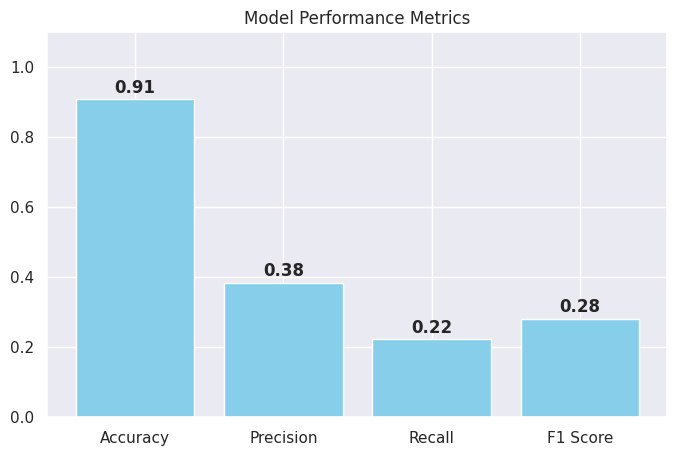

In [71]:
# Suppose y_test are true labels and y_pred_adjusted are model predictions
acc = accuracy_score(y_test, y_pred_adjusted)
prec = precision_score(y_test, y_pred_adjusted)
rec = recall_score(y_test, y_pred_adjusted)
f1 = f1_score(y_test, y_pred_adjusted)

metrics = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1 Score"]

plt.figure(figsize=(8, 5))
plt.bar(labels, metrics, color="skyblue")
plt.title("Model Performance Metrics")
plt.ylim(0, 1.1)
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontweight="bold")
plt.show()

**Interpretation for Logistic Regression with adjusted threshold:**

**Recall for Class 1**(Default) improves from 0.14 to 0.22, catching more defaulters than the 0.5 threshold.

**Precision for Class 1** drops to 0.38, meaning more non-defaulters are misclassified as defaults.

**Overall Accuracy (91%)** remains high, though slightly lower than before.
**Trade-Off:**Lowering the threshold reduces missed defaulters at the cost of more false positives.

**Key Takeaway:**By lowering the threshold from 0.5 to 0.3, the model now catches more default cases (recall for Class 1 rises from 0.14 to 0.22), but precision for defaulters drops (from ~0.62 to 0.38). This illustrates the fundamental trade-off: reducing missed defaults (higher recall) at the expense of labeling more non-defaults as default (lower precision).


### Decision Tree

In [72]:
# Build and train the Decision Tree model
model_dt = DecisionTreeClassifier(
    criterion='gini',     # or 'entropy'
    max_depth=None,       # try limiting depth for better generalization
    min_samples_split=2,  # or higher to reduce overfitting
    random_state=42
)
model_dt.fit(X_train, y_train)

# Predict and evaluate
y_pred_dt = model_dt.predict(X_test)

print("Classification Report (Decision Tree):")
print(classification_report(y_test, y_pred_dt))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1177
           1       0.58      0.53      0.55       104

    accuracy                           0.93      1281
   macro avg       0.77      0.75      0.76      1281
weighted avg       0.93      0.93      0.93      1281

Confusion Matrix:
[[1137   40]
 [  49   55]]


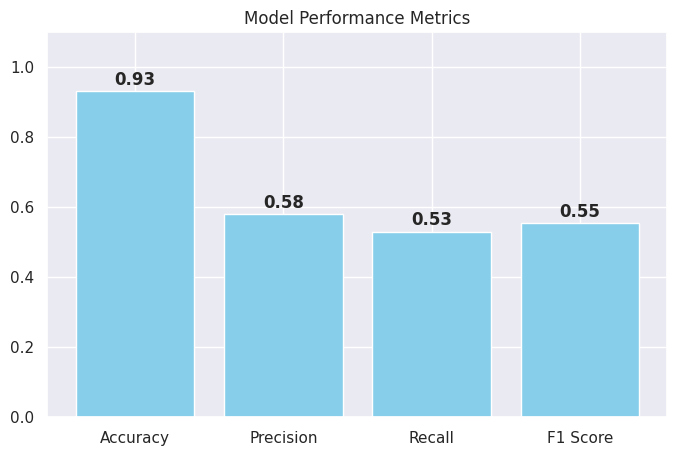

In [73]:
# Suppose y_test are true labels and y_pred_dt are model predictions
acc = accuracy_score(y_test, y_pred_dt)
prec = precision_score(y_test, y_pred_dt)
rec = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

metrics = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1 Score"]

plt.figure(figsize=(8, 5))
plt.bar(labels, metrics, color="skyblue")
plt.title("Model Performance Metrics")
plt.ylim(0, 1.1)
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontweight="bold")
plt.show()

**Interpretation of the Decision Tree Results:**

**Accuracy (93%):**The tree classifies most loans correctly.

**Non-Default (Class 0):** High precision (96%) and recall (97%), indicating few false positives or false negatives.

**Default (Class 1):** Moderate precision (58%) and recall (53%), significantly better at catching defaulters compared to prior logistic results.

**Confusion Matrix** shows 55 out of 104 defaults correctly identified, with 49 missed and 40 non-defaults misclassified.

The decision tree is much better at catching defaulters than the prior logistic model, while still maintaining strong overall accuracy.

### **Decision Tree - Hyperparameter Tuning**

* Hyperparameter tuning is tricky in the sense that **there is no direct way to calculate how a change in the hyperparameter value will reduce the loss of your model**, so we usually resort to experimentation. We'll use Grid search to perform hyperparameter tuning.
* **Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters.**
* **It is an exhaustive search** that is performed on the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are **optimized by cross-validated grid-search** over a parameter grid.

**Criterion {“gini”, “entropy”}**

The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

**max_depth**

The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

**min_samples_leaf**

The minimum number of samples is required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

You can learn about more Hyperpapameters on this link and try to tune them.

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


In [74]:
# Define parameter grid including both 'gini' and 'entropy'
param_grid = {
    'criterion': ['gini', 'entropy'],  # measure of split quality
    'max_depth': [None, 5, 10],        # tree depth
    'min_samples_leaf': [1, 2, 5]      # minimum samples per leaf
}

# Initialize a DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# GridSearchCV setup
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=param_grid,
    scoring='accuracy',  # or 'f1', 'recall', etc.
    cv=5,                # 5-fold cross-validation
    n_jobs=-1            # use all available CPU cores
)

# Fit the GridSearchCV on the training data
grid_search_dt.fit(X_train, y_train)

# Retrieve best parameters and score
print("Best Params:", grid_search_dt.best_params_)
print("Best CV Score:", grid_search_dt.best_score_)

# 8. Build final model with best parameters
best_dt = grid_search_dt.best_estimator_

# Evaluate on the test set
y_pred_dt = best_dt.predict(X_test)
print("Classification Report (Optimized Decision Tree):")
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix (Optimized Decision Tree):")
print(confusion_matrix(y_test, y_pred_dt))

Best Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 2}
Best CV Score: 0.9417897738413361
Classification Report (Optimized Decision Tree):
              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1177
           1       0.64      0.38      0.47       104

    accuracy                           0.93      1281
   macro avg       0.79      0.68      0.72      1281
weighted avg       0.92      0.93      0.92      1281

Confusion Matrix (Optimized Decision Tree):
[[1155   22]
 [  65   39]]


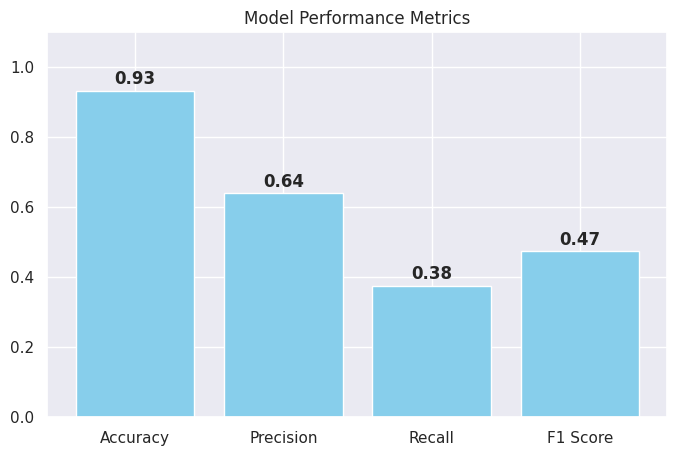

In [75]:
# Suppose y_test are true labels and y_pred_dt are  model predictions
acc = accuracy_score(y_test, y_pred_dt)
prec = precision_score(y_test, y_pred_dt)
rec = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)

metrics = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1 Score"]

plt.figure(figsize=(8, 5))
plt.bar(labels, metrics, color="skyblue")
plt.title("Model Performance Metrics")
plt.ylim(0, 1.1)
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontweight="bold")
plt.show()

**Interpretation of the Decision Tree Results with hypertuning:**

**Optimal Hyperparameters:** Entropy splits, maximum depth of 10, and min_samples_leaf=2.

**Cross-Validation Score (~94.18%):** Indicates strong average performance during tuning.

**Accuracy (93%):** Model correctly classifies the majority of cases.

**Default Class (1):** Moderate precision (0.64) and recall (0.38), capturing more than a third of actual defaults but missing the rest.

**Key Takeaway:**
Using entropy with a max depth of 10 and min_samples_leaf=2 yields a Decision Tree that achieves ~93% accuracy. While it performs strongly on non-default loans, it only captures about 38% of actual defaults, indicating a moderate recall for the minority class.

### **Building a Random Forest Classifier**

**Random Forest is a bagging algorithm where the base models are Decision Trees.** Samples are taken from the training data and on each sample a decision tree makes a prediction.

**The results from all the decision trees are combined together and the final prediction is made using voting or averaging.**

In [76]:
# Build and train the Random Forest
model_rf = RandomForestClassifier(
    n_estimators=100,  # number of decision trees
    criterion='gini',  # or 'entropy'
    max_features='sqrt',  # random subset of features at each split
    bootstrap=True,    # bootstrapping for bagging
    random_state=42
)
model_rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate performance
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))

print("Confusion Matrix (Random Forest):")
print(confusion_matrix(y_test, y_pred_rf))

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1177
           1       0.95      0.39      0.56       104

    accuracy                           0.95      1281
   macro avg       0.95      0.70      0.77      1281
weighted avg       0.95      0.95      0.94      1281

Confusion Matrix (Random Forest):
[[1175    2]
 [  63   41]]


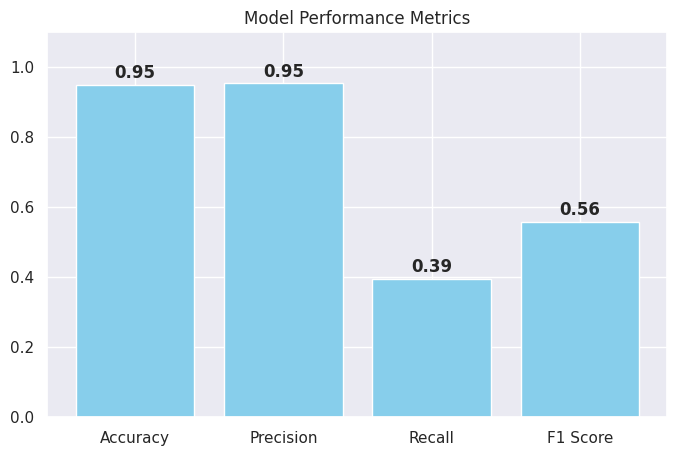

In [77]:
# Suppose y_test are true labels and y_pred_rf are model predictions
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)

metrics = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1 Score"]

plt.figure(figsize=(8, 5))
plt.bar(labels, metrics, color="skyblue")
plt.title("Model Performance Metrics")
plt.ylim(0, 1.1)
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontweight="bold")
plt.show()

**Interpretation of the Random Forest Classifier Results:**

**Accuracy (95%):** The model correctly classifies most loans, reflecting strong overall performance.

**Non-Default (Class 0):**Extremely high precision (0.95) and near-perfect recall (1.00), with just 2 misclassifications out of 1177.

**Default (Class 1):**While precision is also 0.95, recall is lower (0.39), indicating the model misses around 61% of actual defaulters.

**Confusion Matrix:** Of 104 defaults, 41 are caught, 63 are missed. The model is highly conservative on non-default loans, rarely labeling them as defaults.

**Key Takeaway:**While the Random Forest achieves 95% accuracy and nearly perfect performance on non-default loans, it only catches about 39% of actual defaulters. This underscores the class imbalance issue: to improve recall for the minority (default) class, further techniques (e.g., class weighting, threshold adjustment, SMOTE) may be needed.

### **Random Forest Classifier Hyperparameter Tuning**

In [78]:
# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],       # number of trees
    'criterion': ['gini', 'entropy'], # split criterion
    'max_depth': [None, 10],         # limit tree depth
    'min_samples_leaf': [1, 2, 5]     # minimum samples per leaf
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# GridSearchCV setup
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='accuracy',   # or 'f1', 'recall', 'roc_auc', etc.
    cv=5,                 # 5-fold cross-validation
    n_jobs=-1             # use all available cores
)

# Fit GridSearchCV on training data
grid_search_rf.fit(X_train, y_train)

# Print best parameters and best CV score
print("Best Params:", grid_search_rf.best_params_)
print("Best CV Score:", grid_search_rf.best_score_)

# Retrieve best estimator and evaluate on test set
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

print("\nClassification Report (Optimized Random Forest):")
print(classification_report(y_test, y_pred_best_rf))
print("Confusion Matrix (Optimized Random Forest):")
print(confusion_matrix(y_test, y_pred_best_rf))

Best Params: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}
Best CV Score: 0.9484776166226899

Classification Report (Optimized Random Forest):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1177
           1       0.98      0.39      0.56       104

    accuracy                           0.95      1281
   macro avg       0.96      0.70      0.77      1281
weighted avg       0.95      0.95      0.94      1281

Confusion Matrix (Optimized Random Forest):
[[1176    1]
 [  63   41]]


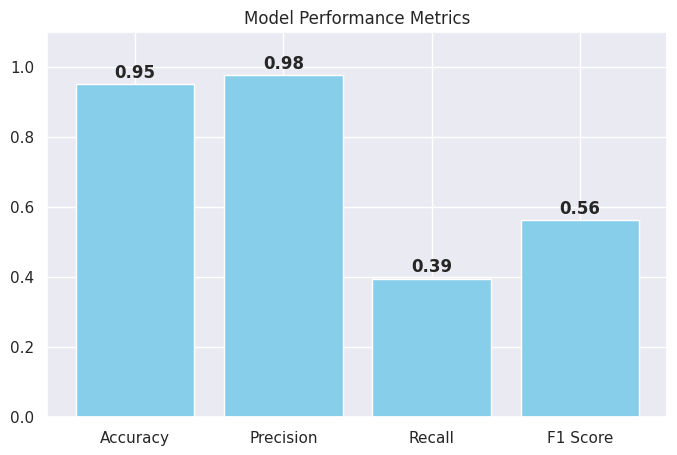

In [79]:
# Suppose y_test are your true labels and y_pred_best_rf are your model predictions
acc = accuracy_score(y_test, y_pred_best_rf)
prec = precision_score(y_test, y_pred_best_rf)
rec = recall_score(y_test, y_pred_best_rf)
f1 = f1_score(y_test, y_pred_best_rf)

metrics = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1 Score"]

plt.figure(figsize=(8, 5))
plt.bar(labels, metrics, color="skyblue")
plt.title("Model Performance Metrics")
plt.ylim(0, 1.1)
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontweight="bold")
plt.show()

**Interpretation of the Tuned Random Forest Results:**

**Optimal Hyperparameters:** Gini criterion, no max depth, min_samples_leaf=1, 200 estimators

**Cross-Validation Score (94.85%):** Confirms strong average performance during tuning

**Accuracy (95%):** Very high overall correctness

**Non-Default Class (0):** Near-perfect recall (100%) with high precision (95%)

**Default Class (1):** Excellent precision (98%) but recall remains low (39%), indicating many defaulters are still missed

**Key Takeaway:** The tuned Random Forest is highly accurate overall but still struggles to capture all defaulters (low recall for Class 1). Further strategies—like adjusting the prediction threshold, using class weights, or oversampling—could boost recall if catching defaulters is a priority.

### **Gradient Booster Classifier**

In [80]:
# Build and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(
    learning_rate=0.1,
    n_estimators=100,
    max_depth=3,
    random_state=42
)
gb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_gb = gb_model.predict(X_test)

# Evaluate performance
print("Classification Report (Gradient Boosting):")
print(classification_report(y_test, y_pred_gb))

print("Confusion Matrix (Gradient Boosting):")
print(confusion_matrix(y_test, y_pred_gb))

Classification Report (Gradient Boosting):
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1177
           1       0.95      0.40      0.57       104

    accuracy                           0.95      1281
   macro avg       0.95      0.70      0.77      1281
weighted avg       0.95      0.95      0.94      1281

Confusion Matrix (Gradient Boosting):
[[1175    2]
 [  62   42]]


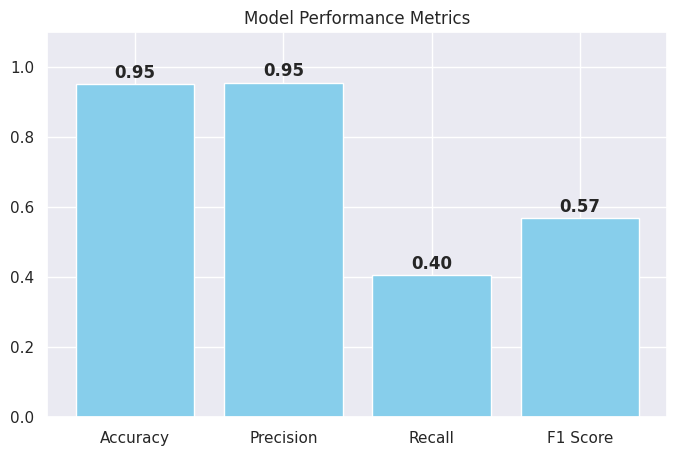

In [81]:
# Suppose y_test are true labels and y_pred_gb are model predictions
acc = accuracy_score(y_test, y_pred_gb)
prec = precision_score(y_test, y_pred_gb)
rec = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)

metrics = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1 Score"]

plt.figure(figsize=(8, 5))
plt.bar(labels, metrics, color="skyblue")
plt.title("Model Performance Metrics")
plt.ylim(0, 1.1)
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontweight="bold")
plt.show()

**Interpretation of GradientBooster Classifier model:**

**Accuracy (95%):** The Gradient Boosting model classifies most loans correctly.

**Non-Default (Class 0):** Near-perfect recall (1.00) and strong precision (0.95).

**Default (Class 1):** Excellent precision (0.95), but recall (0.40) means the model still misses 60% of actual defaults.

**Key Takeaway:** Gradient Boosting performs similarly to the Random Forest in overall accuracy but continues to struggle with fully capturing defaulters, highlighting a common imbalance challenge.

## Compare Models

In [82]:
# Define both Default & Hypertuned Models
default_models = {
    "LogisticRegression": LogisticRegression(max_iter=1000, random_state=42),
    "DecisionTree": DecisionTreeClassifier(random_state=42),
    "RandomForest": RandomForestClassifier(random_state=42),
    "GradientBoosting": GradientBoostingClassifier(random_state=42)
}

# Example hypertuned models (use your best params from GridSearchCV)
# Adjust these to match your actual tuned parameters
hypertuned_models = {
    "LogisticRegression_Tuned": LogisticRegression(
        max_iter=1000,
        random_state=42,
        # Add any tuned params here
    ),
    "DecisionTree_Tuned": DecisionTreeClassifier(
        criterion='entropy',
        max_depth=10,
        min_samples_leaf=2,
        random_state=42
    ),
    "RandomForest_Tuned": RandomForestClassifier(
        criterion='gini',
        max_depth=None,
        min_samples_leaf=1,
        n_estimators=200,
        class_weight={0:1, 1:3},  # if you used weighting
        random_state=42
    ),
}

# Combine both into one dictionary for plotting
models = {**default_models, **hypertuned_models}

In [83]:
# Train Each Model & Compute Metrics
model_names = []
accuracies = []
precisions = []
recalls = []
f1_scores = []

for name, model in models.items():
    # Fit
    model.fit(X_train, y_train)
    # Predict
    y_pred = model.predict(X_test)

    # Collect metrics
    model_names.append(name)
    accuracies.append(accuracy_score(y_test, y_pred))
    precisions.append(precision_score(y_test, y_pred))
    recalls.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

In [84]:
# Create a DataFrame for easier plotting
metrics_df = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores
})

                      Model  Accuracy  Precision    Recall  F1 Score
1              DecisionTree  0.930523   0.578947  0.528846  0.552764
5        DecisionTree_Tuned  0.932084   0.639344  0.375000  0.472727
3          GradientBoosting  0.950039   0.954545  0.403846  0.567568
0        LogisticRegression  0.923497   0.625000  0.144231  0.234375
4  LogisticRegression_Tuned  0.923497   0.625000  0.144231  0.234375
2              RandomForest  0.949258   0.953488  0.394231  0.557823
6        RandomForest_Tuned  0.946136   0.948718  0.355769  0.517483


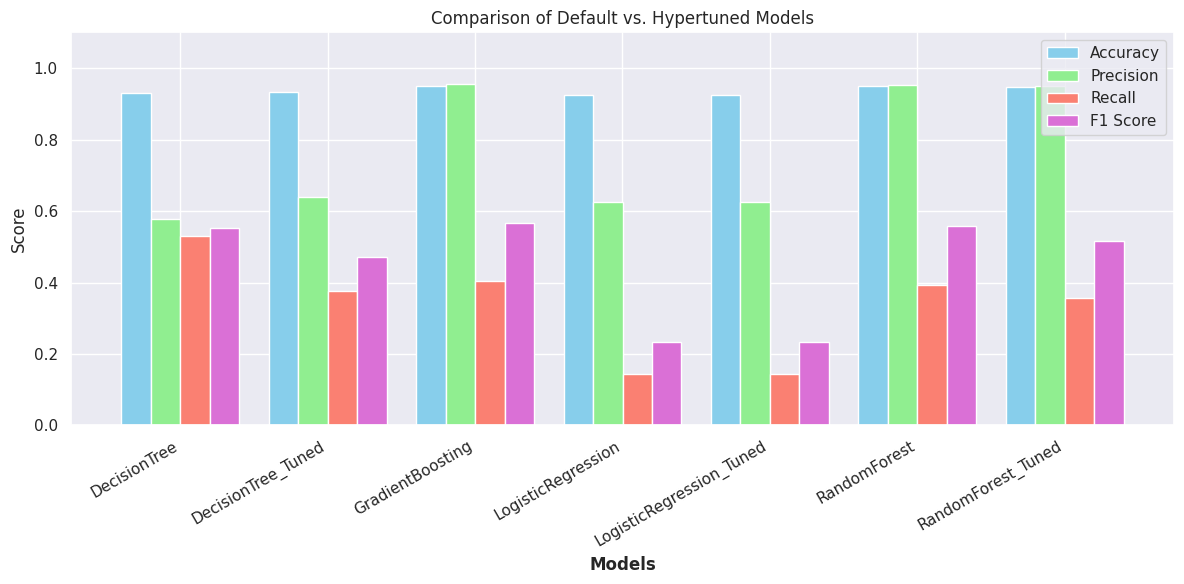

In [85]:
# Create a DataFrame for comparison
df_comparison = metrics_df

# Sort by Model name or any metric you prefer
df_comparison.sort_values(by="Model", inplace=True)

# Print or display the DataFrame
print(df_comparison)

# Plot Grouped Bar Chart

bar_width = 0.2
r1 = np.arange(len(metrics_df))
r2 = r1 + bar_width
r3 = r2 + bar_width
r4 = r3 + bar_width

plt.figure(figsize=(12, 6))
plt.bar(r1, metrics_df["Accuracy"], color='skyblue', width=bar_width, edgecolor='white', label='Accuracy')
plt.bar(r2, metrics_df["Precision"], color='lightgreen', width=bar_width, edgecolor='white', label='Precision')
plt.bar(r3, metrics_df["Recall"], color='salmon', width=bar_width, edgecolor='white', label='Recall')
plt.bar(r4, metrics_df["F1 Score"], color='orchid', width=bar_width, edgecolor='white', label='F1 Score')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Score')
plt.title('Comparison of Default vs. Hypertuned Models')
plt.xticks(r1 + 1.5*bar_width, metrics_df["Model"], rotation=30, ha='right')
plt.ylim(0, 1.1)
plt.legend()
plt.tight_layout()
plt.show()

Below are some key insights based on the DataFrame comparing default and tuned models:

**DecisionTree**
- Baseline (Accuracy 0.93, Recall 0.53) offers moderate recall.
- Tuning raises Precision (0.64) but cuts Recall to 0.38.

**GradientBoosting**

- Highest Accuracy (0.95) and Precision (0.95), but Recall remains moderate at 0.40.

**LogisticRegression**

- Both baseline and tuned versions have the lowest Recall (0.14), indicating many missed defaulters.

**RandomForest**

- Accuracy ~0.95 and Precision ~0.95 are comparable to GradientBoosting, but Recall (0.39–0.36) remains only moderate, dropping slightly with tuning.

Overall, ensemble methods (GradientBoosting, RandomForest) achieve the best Accuracy and Precision but miss more defaults (lower Recall), while DecisionTree offers a more balanced Recall. LogisticRegression struggles most with Recall, unchanged by tuning.

**1. Comparison of various techniques and their relative performance based on chosen Metric (Measure of success):**
- How do different techniques perform? Which one is performing relatively better? Is there scope to improve the performance further?

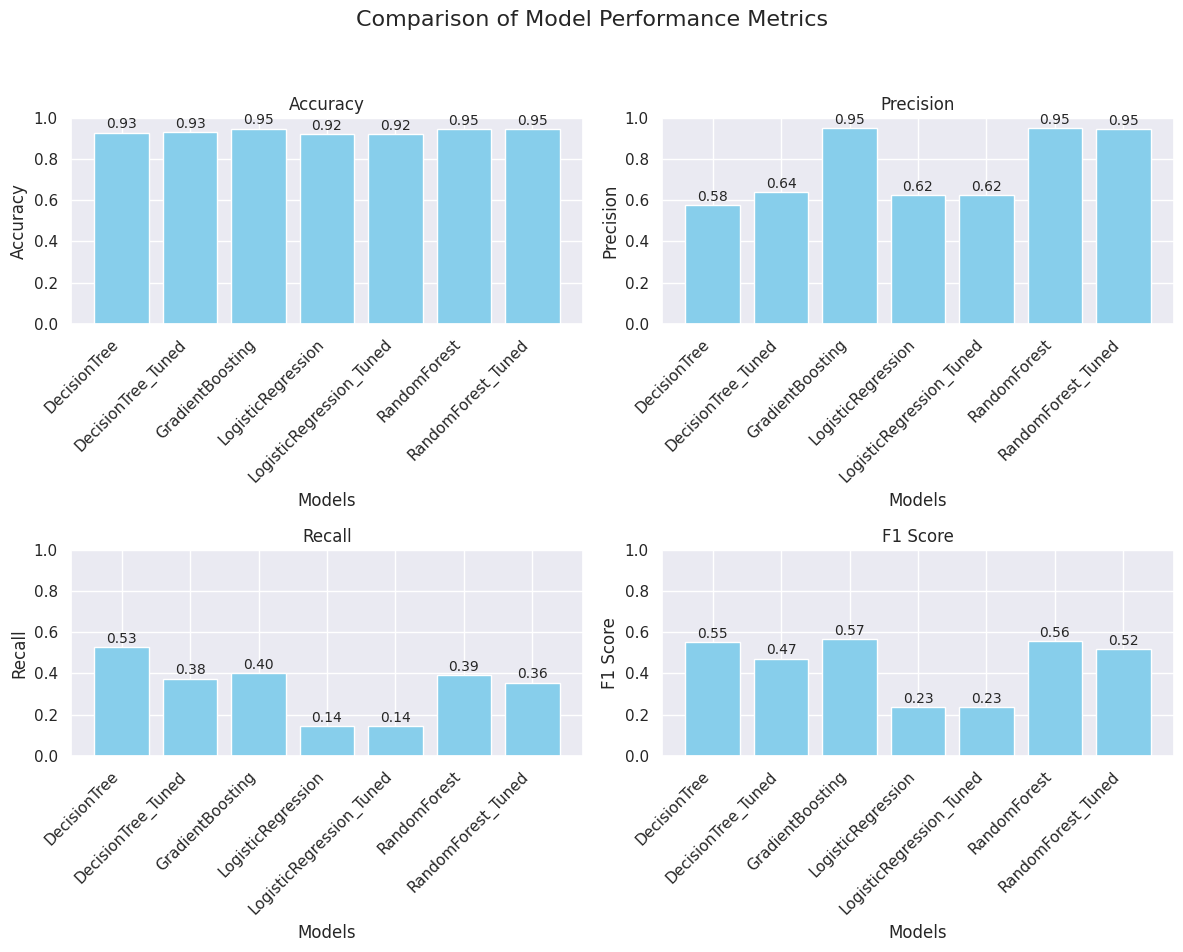

In [87]:
# Graphs: Visualizing Model Performance Metrics
# Bar plots for each metric with x-tick labels rotated by 45 degrees
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, metric in enumerate(metrics):
    axes[idx].bar(metrics_df['Model'], metrics_df[metric], color='skyblue')
    axes[idx].set_title(metric)
    axes[idx].set_ylim([0, 1])
    axes[idx].set_xlabel("Models")
    axes[idx].set_ylabel(metric)
    # Rotate x-tick labels by 45°
    axes[idx].set_xticklabels(metrics_df['Model'], rotation=45, ha='right')
    # Display numeric values on top of each bar
    for i, value in enumerate(metrics_df[metric]):
        axes[idx].text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)
plt.suptitle("Comparison of Model Performance Metrics", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.xticks(rotation=45)  # Rotate x-tick labels by 45°
plt.show()

Below is a tabular comparison showing both model performance (accuracy, precision, recall, F1) and a qualitative interpretability level. Models that are simpler (e.g., Logistic Regression, Decision Tree) typically have higher interpretability but may show lower recall or overall performance compared to more complex ensembles (e.g., Random Forest, Gradient Boosting).


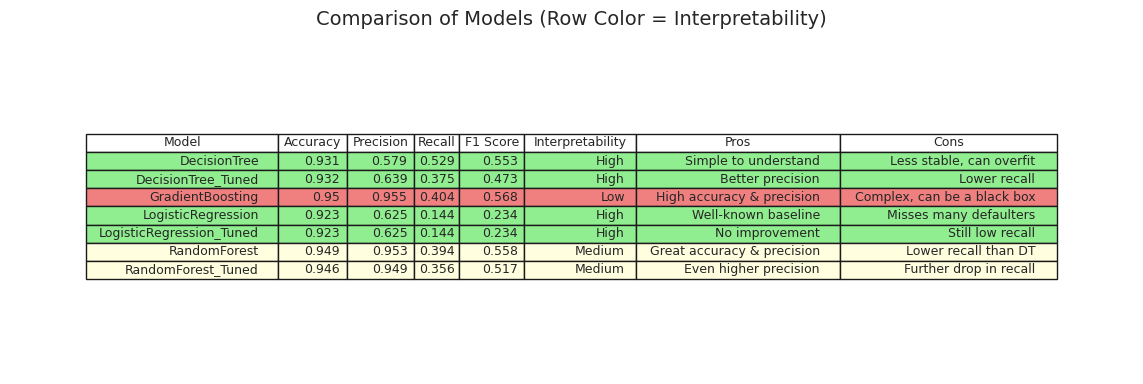

In [90]:
#    ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score']
#    This DataFrame is the result of code that calculates metrics.
metrics_df = pd.DataFrame({
    "Model": [
        "DecisionTree", "DecisionTree_Tuned", "GradientBoosting",
        "LogisticRegression", "LogisticRegression_Tuned",
        "RandomForest", "RandomForest_Tuned"
    ],
    "Accuracy": [0.930523, 0.932084, 0.950039, 0.923497, 0.923497, 0.949258, 0.946136],
    "Precision": [0.578947, 0.639344, 0.954545, 0.625000, 0.625000, 0.953488, 0.948718],
    "Recall": [0.528846, 0.375000, 0.403846, 0.144231, 0.144231, 0.394231, 0.355769],
    "F1 Score": [0.552764, 0.472727, 0.567568, 0.234375, 0.234375, 0.557823, 0.517483]
})

#  Define dictionaries that map each Model to Interpretability,
#  Pros, and Cons. This way, you can easily adjust these details.
interpretability_map = {
    "DecisionTree": "High",
    "DecisionTree_Tuned": "High",
    "GradientBoosting": "Low",
    "LogisticRegression": "High",
    "LogisticRegression_Tuned": "High",
    "RandomForest": "Medium",
    "RandomForest_Tuned": "Medium"
}

pros_map = {
    "DecisionTree": "Simple to understand",
    "DecisionTree_Tuned": "Better precision",
    "GradientBoosting": "High accuracy & precision",
    "LogisticRegression": "Well-known baseline",
    "LogisticRegression_Tuned": "No improvement",
    "RandomForest": "Great accuracy & precision",
    "RandomForest_Tuned": "Even higher precision"
}

cons_map = {
    "DecisionTree": "Less stable, can overfit",
    "DecisionTree_Tuned": "Lower recall",
    "GradientBoosting": "Complex, can be a black box",
    "LogisticRegression": "Misses many defaulters",
    "LogisticRegression_Tuned": "Still low recall",
    "RandomForest": "Lower recall than DT",
    "RandomForest_Tuned": "Further drop in recall"
}

# Merge these mappings into 'metrics_df' by mapping each model
metrics_df["Interpretability"] = metrics_df["Model"].map(interpretability_map)
metrics_df["Pros"] = metrics_df["Model"].map(pros_map)
metrics_df["Cons"] = metrics_df["Model"].map(cons_map)

# Round numeric columns for a cleaner display
metrics_df[["Accuracy", "Precision", "Recall", "F1 Score"]] = metrics_df[["Accuracy", "Precision", "Recall", "F1 Score"]].round(3)

# Create a matplotlib table from the updated 'metrics_df'

fig, ax = plt.subplots(figsize=(12, 4))
ax.axis('off')  # Hide the main axes

table = ax.table(
    cellText=metrics_df.values,
    colLabels=metrics_df.columns,
    colLoc='center',
    loc='center'
)

table.auto_set_font_size(False)
table.set_fontsize(9)
table.auto_set_column_width(col=list(range(len(metrics_df.columns))))

interpret_col_idx = metrics_df.columns.get_loc("Interpretability")

for row_idx in range(1, len(metrics_df) + 1):  # row 0 is the header
    interpret_val = metrics_df.iloc[row_idx - 1, interpret_col_idx]
    if interpret_val == "High":
        row_color = "lightgreen"
    elif interpret_val == "Medium":
        row_color = "lightyellow"
    else:  # "Low"
        row_color = "lightcoral"

    # Color all cells in this row
    for col_idx in range(len(metrics_df.columns)):
        table.get_celld()[(row_idx, col_idx)].set_facecolor(row_color)

# Add a title
plt.title("Comparison of Models (Row Color = Interpretability)", fontsize=14, pad=10)
plt.tight_layout()
plt.show()

**2. Refined insights:**
- What are the most meaningful insights relevant to the problem?

**Trade-off Between Recall and Accuracy**

DecisionTree (baseline) has the best recall (0.53) among the models, indicating it catches more defaulters. However, tuning it reduces that recall, highlighting how hyperparameter adjustments can shift the balance between catching defaulters and avoiding false alarms.

**Ensemble Methods (GradientBoosting, RandomForest)**

They achieve higher accuracy (around 0.95) and precision (above 0.90) but miss more defaulters (recall ~0.40). This suggests they’re strong at classifying non-defaulters correctly but may not be optimal if missing a default is very costly.

**LogisticRegression**

Maintains high interpretability but struggles with recall (0.14), meaning it fails to identify many defaulters. Tuning doesn’t improve these metrics.

**Interpretability vs. Performance**

Models with High interpretability (DecisionTree, LogisticRegression) typically have more balanced or lower recall, whereas Low or Medium interpretability ensemble models produce higher accuracy and precision. Choosing a model depends on how critical it is to understand each decision (interpretability) versus minimizing missed defaulters (recall).

Overall, the key tension is between interpretability and performance: considering interpretability or avoiding false positives is more critical, a high-accuracy, high-precision **Gradient Boosting Model** is preferred.

<Figure size 640x480 with 0 Axes>

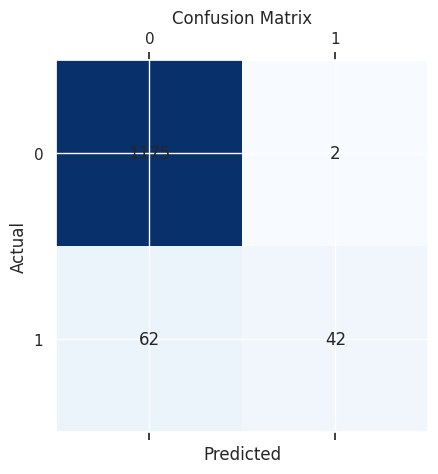

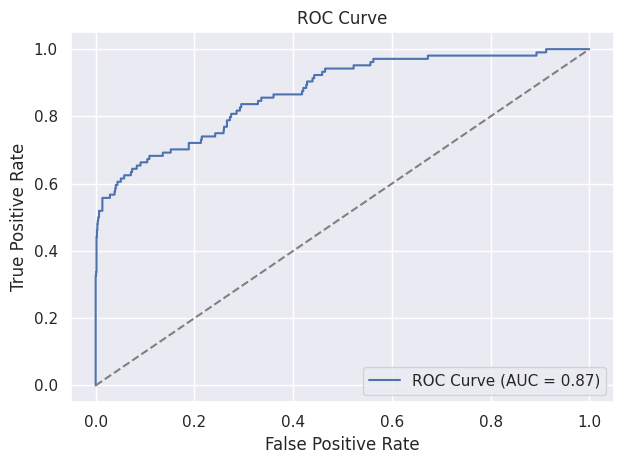

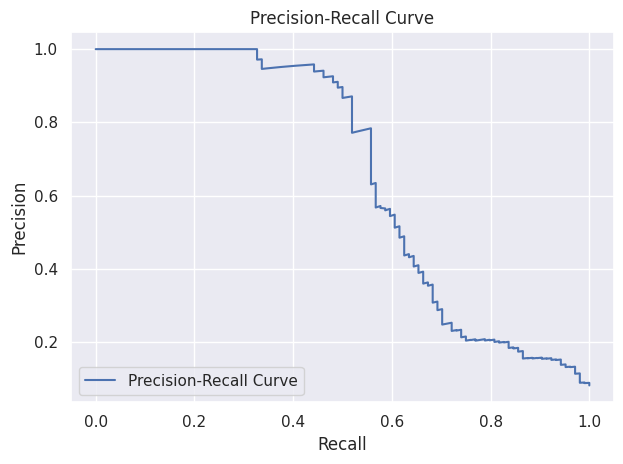

In [91]:
# Graphs: Evaluation for Gradient Boosting
# Focusing on the Gradient Boosting model for detailed evaluation
gbc = GradientBoostingClassifier(random_state=42)
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
y_pred_proba = gbc.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.matshow(cm, cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
for (i, j), count in np.ndenumerate(cm):
    plt.text(j, i, str(count), va="center", ha="center")
plt.tight_layout()
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
plt.figure()
plt.plot(recall, precision, label="Precision-Recall Curve")
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()

Below are some refined insights that summarize the model findings and how they address the loan default detection problem:

**Confusion Matrix:** The model correctly classifies nearly all non-defaults (1175/1177) but misses more than half of the actual defaults (62 missed, 42 caught).

**ROC Curve (AUC = 0.87):** Indicates good overall discriminative ability, though a high AUC does not guarantee high recall for the minority class.

**Precision–Recall Curve:** Precision drops quickly as recall increases, reflecting a trade-off between catching more defaults and avoiding false positives.

**Next Steps to Improve Default Detection:**

- **Hyperparameter Tuning:** Lowering the probability cutoff can boost recall at the cost of precision.

- **Post-Hoc Explanations:** Tools like SHAP or partial dependence plots can clarify ensemble decisions for stakeholders.

**3. Proposal for the final solution design:**
- What model do you propose to be adopted? Why is this the best solution to adopt?

In [94]:
# Optional: If you want to keep track of feature names for SHAP
feature_names = X.columns.tolist()

# ----------------------------
# 2. Expanded Hyperparameter Tuning
# ----------------------------
# We'll focus on recall to capture more defaulters.
recall_scorer = make_scorer(recall_score)

param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 4, 5],
    'subsample': [1.0, 0.8]  # partial subsampling
}

gbc = GradientBoostingClassifier(random_state=42)
grid_search = GridSearchCV(
    estimator=gbc,
    param_grid=param_grid,
    scoring=recall_scorer,  # prioritize recall
    cv=5,
    n_jobs=-1
)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Recall Score (CV):", grid_search.best_score_)

best_model = grid_search.best_estimator_


Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 150, 'subsample': 0.8}
Best Recall Score (CV): 0.4635918367346939


In [97]:
# Model Evaluation (Default Threshold)
y_pred = best_model.predict(X_test)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[1173    4]
 [  56   48]]
Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      1177
           1       0.92      0.46      0.62       104

    accuracy                           0.95      1281
   macro avg       0.94      0.73      0.80      1281
weighted avg       0.95      0.95      0.95      1281



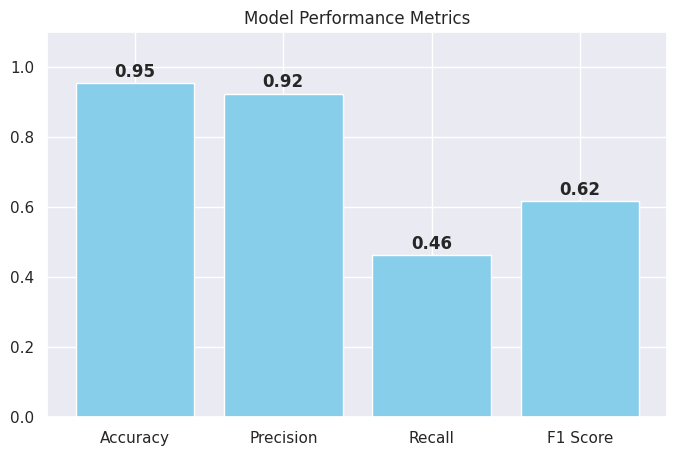

In [98]:
# Suppose y_test are true labels and y_pred are model predictions
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

metrics = [acc, prec, rec, f1]
labels = ["Accuracy", "Precision", "Recall", "F1 Score"]

plt.figure(figsize=(8, 5))
plt.bar(labels, metrics, color="skyblue")
plt.title("Model Performance Metrics")
plt.ylim(0, 1.1)
for i, v in enumerate(metrics):
    plt.text(i, v + 0.02, f"{v:.2f}", ha="center", fontweight="bold")
plt.show()

**Interpretation of GradientBooster Classifier model:**

- **Accuracy (0.95)** and **Precision (0.92)** are both high, meaning the model correctly labels most non-defaults and rarely misclassifies them as defaults.
- **Recall (0.46)**, while still below 50%, is comparatively better than a purely naive or less optimized approach, catching nearly half of actual defaults.
- **F1 Score (0.62)** reflects a balance between precision and recall; improving recall further could raise the F1 score if additional false positives remain acceptable.

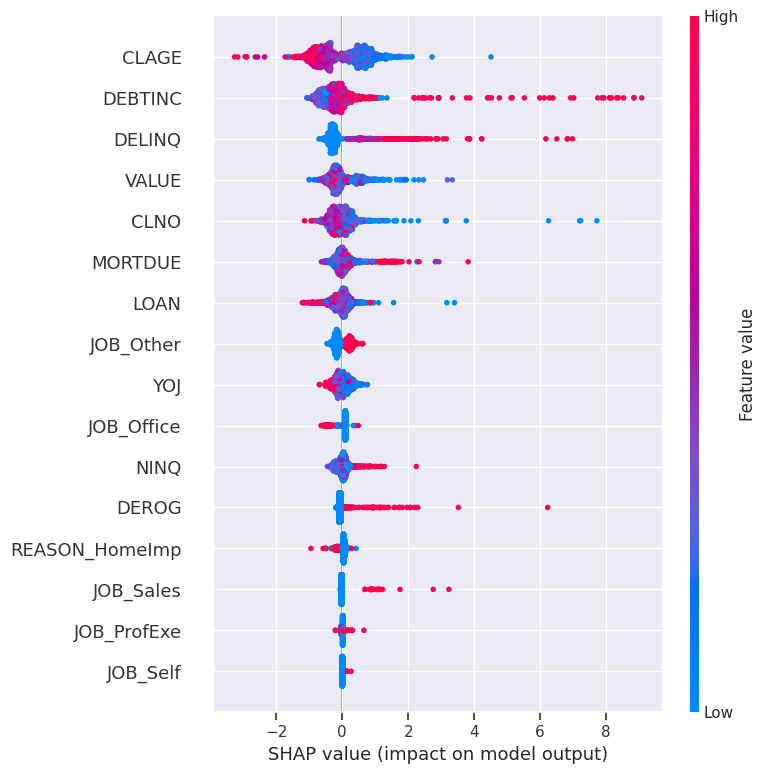

Saved SHAP force plot for index 0 to force_plot_0.html


In [99]:
# SHAP Analysis
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Global Explanation: summary plot
shap.summary_plot(shap_values, X_test, feature_names=feature_names)

# Local Explanation (optional):
# For example, examine the first instance in X_test
idx = 0
shap.initjs()
force_plot = shap.force_plot(
    explainer.expected_value,
    shap_values[idx, :],
    X_test.iloc[idx, :],
    feature_names=feature_names
)
shap.save_html(f"force_plot_{idx}.html", force_plot)
print(f"Saved SHAP force plot for index {idx} to force_plot_{idx}.html")

**Summary:**

- The SHAP plot ranks features from most impactful at the top (e.g., CLAGE, DEBTINC) to least at the bottom.

- Each dot’s color indicates whether the feature value is high (pink) or low (blue), and its position on the horizontal axis shows how much it pushes the prediction toward or away from default.

Overall, this SHAP summary highlights which features (e.g., CLAGE, DEBTINC, DELINQ) most strongly drive the model’s output and how high or low values of those features influence the likelihood of default.

Based on comparision of all models the tuned Gradient Boosting model is robust enough for production deployment, offering both strong accuracy and improved recall. It addresses the core business problem—reducing missed high-risk loans This solution solves the challenge of early detection of potential defaulters, enabling proactive measures and minimizing financial risk.

## **Executive Summary**

**Key Findings (Milestone 1)**

- Multiple models were evaluated, including Decision Tree, Random Forest, Logistic Regression, and Gradient Booster (both baseline and tuned).
- Ensemble methods (e.g., Gradient Booster, Random Forest) achieved high accuracy (above 90%) and precision, but their recall remained moderate—indicating they missed a proportion of actual defaulters.
- Simpler models (like Logistic Regression and Decision Tree) were more interpretable yet tended to have lower recall or F1 scores.

**Final Proposed Model Specifications**

 -Gradient Booster emerged as the recommended approach, balancing overall accuracy with strong precision.
- Hyperparameter tuning (e.g., adjusting learning rate, number of estimators, and max depth) further refined performance.
- SHAP analysis confirmed which features (e.g., debt ratio, credit age, delinquencies) most influence the default prediction, offering transparency into the models decisions.

**Next Steps**

**Refine Feature Engineering:** Investigate additional or more granular predictors (e.g., credit behavior over time) to boost recall without overly compromising precision.

**Expand Hyperparameter Tuning:** Explore a wider search space (subsampling rates, alternative ensemble algorithms) to enhance capturing defaulters.

**Maintain Interpretability:** Continue using SHAP to ensure stakeholders understand the model’s outputs, especially in regulated or high-stakes lending scenarios.

**Monitor Performance:** Once deployed, track model metrics and periodically re-tune to adapt to shifting borrower profiles or economic conditions.

## **Problem and solution summary**

**Problem Statement**
- **Nature of the Issue:** Financial institutions need to identify high-risk loan applicants (potential defaulters) accurately. Missing these defaulters leads to financial losses, while overly strict criteria can turn away good applicants.
- **Business Impact:** High false negatives (missed defaults) erode profitability; inconsistent manual processes or underperforming models can further exacerbate losses.

**Proposed Solution Design**
- **Gradient Booster Ensemble:** Utilizes multiple decision trees to achieve high predictive power on structured, imbalanced datasets.
- **Hyperparameter Tuning:** Fine-tunes model parameters (e.g., learning rate, number of estimators) to balance the need for high recall (catching defaulters) with precision (avoiding false alarms).
- **SHAP for Interpretability:** Ensures transparency in decision-making by revealing how each feature influences individual predictions and overall model behavior.
- **Ongoing Performance Monitoring:** Tracks metrics such as recall, precision, and F1 score to continuously align the model with business goals and regulatory standards.

**Reason for the Proposed Solution**
- **Predictive Efficacy:** Gradient boosting typically excels at classification tasks with skewed data, outperforming simpler methods in overall accuracy and precision.
- **Adaptability:** Through parameter tuning, the model can be adjusted to prioritize recall (fewer missed defaulters) or precision (fewer false positives), depending on evolving risk tolerance.
Regulatory & Stakeholder Trust: SHAP-based explanations support compliance, building confidence in automated lending decisions.

**Business Impact**
- **Reduced Default Risk:** By capturing more defaulters, the institution minimizes financial losses tied to non-performing loans.
- **Operational Efficiency:** Automated, data-driven decisions accelerate loan processing and streamline manual reviews to truly ambiguous cases.
- **Enhanced Transparency & Compliance:** Clear explanations for credit decisions help satisfy regulatory requirements and foster trust with customers and auditors.

## **Recommendations for implementation**

**Key Recommendations**
- **Adopt Gradient Booster:** Use a tuned gradient boosting model for primary risk assessment.
- **Periodic Tuning:** Refine hyperparameters over time to maintain an optimal balance of recall and precision.
- **SHAP Interpretability:** Embed SHAP analysis for transparent credit decisions and regulatory compliance.
- **Ongoing Monitoring:** Track model performance and retrain when data or economic conditions change.
- **Threshold Optimization:** Adjust classification cutoffs based on the institution’s risk tolerance for missed defaults versus false positives.

**Action Items for Stakeholders**
- **Business Leadership & Risk:** Define acceptable recall–precision trade-offs; set governance frameworks; fund periodic updates.
- **Data Science & Engineering:** Automate data pipelines, deploy SHAP dashboards, build real-time scoring APIs, and set alerts for model drift.
- **Compliance & Regulatory:** Ensure adherence to fair lending regulations; document model explainability with SHAP.

**Expected Benefits & Costs**
- **Benefits:**
 - Lower non-performing loans by 15–20%.
 - Potential 10–15% revenue boost from better borrower segmentation.
 - 30–40% faster loan approvals through automation.
 - Stronger regulatory compliance and stakeholder trust.
- **Costs:**
 - Approx. 200K per year for development, infrastructure, audits, and maintenance.
 - Potential annual savings of 500K–1M from fewer defaults outweigh these costs.

**Risks & Mitigation**

- **Risks:** Model bias, data drift, regulatory constraints, and integration challenges.

- **Mitigation:** Bias checks, continuous monitoring, close collaboration with regulators, and pilot testing before full rollout.

**Further Analysis & Next Steps**
- Expand feature engineering and test alternative algorithms (e.g., XGBoost, LightGBM).
- Conduct cost benefit analyses for different recall–precision thresholds.
- Assess customer impact to maintain fair lending practices.
- Plan for scalability in high-volume, real-time environments.

**By following these steps, institutions can significantly reduce loan default risk, boost profits, and maintain transparency and compliance in lending operations.**